<a href="https://colab.research.google.com/github/jsntj/jatj_footballtransfermarkt/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis

# load all of the tables

This is a how the data was loaded, which was through personal drive.

In [3]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Colab Notebooks/Datascience_jatj/data' # Replace with your folder path
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dataframes = {}
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_name = os.path.splitext(csv_file)[0]  # Use the filename as the DataFrame name
    dataframes[df_name] = pd.read_csv(file_path)
    print(f"Loaded {csv_file} into DataFrame '{df_name}'")

Mounted at /content/drive
Loaded game_lineups.csv into DataFrame 'game_lineups'
Loaded transfers.csv into DataFrame 'transfers'
Loaded player_valuations.csv into DataFrame 'player_valuations'
Loaded players.csv into DataFrame 'players'
Loaded club_analysis.csv into DataFrame 'club_analysis'
Loaded clubs.csv into DataFrame 'clubs'
Loaded competitions.csv into DataFrame 'competitions'
Loaded appearances.csv into DataFrame 'appearances'
Loaded club_games.csv into DataFrame 'club_games'
Loaded game_events.csv into DataFrame 'game_events'
Loaded games.csv into DataFrame 'games'


# General import + create dataframe

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
players_df = dataframes.get("players")
clubs_df = dataframes.get("clubs")
club_games_df = dataframes.get("club_games")
player_valuations_df = dataframes.get("player_valuations")
appearances_df = dataframes.get("appearances")
games_df = dataframes.get("games")
game_events_df = dataframes.get("game_events")
game_lineups_df = dataframes.get("game_lineups")
transfers_df = dataframes.get("transfers")
competitions_df = dataframes.get("competitions")

# Looking at the headers
we can see that there are Ids that could be merged to compliment in features building

In [6]:
# Assuming you've already loaded these DataFrames
print("Players DataFrame columns:")
print(players_df.columns.tolist())

print("\nClubs DataFrame columns:")
print(clubs_df.columns.tolist())

print("\nClub Games DataFrame columns:")
print(club_games_df.columns.tolist())

print("\nAppearances DataFrame columns:")
print(appearances_df.columns.tolist())

print("\nGames DataFrame columns:")
print(games_df.columns.tolist())

print("\nGame Events DataFrame columns:")
print(game_events_df.columns.tolist())

print("\nGame Lineups DataFrame columns:")
print(game_lineups_df.columns.tolist())

print("\nTransfers DataFrame columns:")
print(transfers_df.columns.tolist())

print("\nCompetitions DataFrame columns:")
print(competitions_df.columns.tolist())

Players DataFrame columns:
['player_id', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name', 'image_url', 'url', 'current_club_domestic_competition_id', 'current_club_name', 'market_value_in_eur', 'highest_market_value_in_eur']

Clubs DataFrame columns:
['club_id', 'club_code', 'name', 'domestic_competition_id', 'total_market_value', 'squad_size', 'average_age', 'foreigners_number', 'foreigners_percentage', 'national_team_players', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season', 'filename', 'url']

Club Games DataFrame columns:
['game_id', 'club_id', 'own_goals', 'own_position', 'own_manager_name', 'opponent_id', 'opponent_goals', 'opponent_position', 'opponent_manager_name', 'hosting', 'is_win']

Appearances DataFrame columns:
['appearance_id', '

# EDA - Players headcount general overview

In [7]:
# Calculate headcount for each position
position_headcount = players_df['position'].value_counts().reset_index()
position_headcount.columns = ['Position', 'Headcount']
print("\nHeadcount of Players by Position:")
position_headcount


Headcount of Players by Position:


,Position,Headcount
0,Defender,10389
1,Midfield,9391
2,Attack,8921
3,Goalkeeper,3720
4,Missing,180


# Building club influence score

In [ ]:
def prepare_player_performance_metrics(appearances_df, player_valuations_df):
    """Prepares player performance metrics from appearances data."""
    # Calculate per-game metrics
    player_performance = appearances_df.groupby('player_id').agg({
        'goals': ['sum', 'mean'],
        'assists': ['sum', 'mean'],
        'minutes_played': ['sum', 'mean'],
        'yellow_cards': ['sum', 'mean'],
        'red_cards': ['sum', 'mean'],
        'game_id': 'count'  # number of games
    }).reset_index()

    # Flatten column names
    player_performance.columns = ['player_id',
                                'total_goals', 'goals_per_game',
                                'total_assists', 'assists_per_game',
                                'total_minutes', 'minutes_per_game',
                                'total_yellow_cards', 'yellow_cards_per_game',
                                'total_red_cards', 'red_cards_per_game',
                                'games_played']

    # Calculate additional metrics
    player_performance['goal_contributions'] = player_performance['total_goals'] + player_performance['total_assists']
    player_performance['goal_contributions_per_game'] = player_performance['goal_contributions'] / player_performance['games_played']
    player_performance['minutes_per_goal_contribution'] = player_performance['total_minutes'] / player_performance['goal_contributions'].replace(0, 1)

    return player_performance

# Prepare player performance metrics
player_performance = prepare_player_performance_metrics(appearances_df, player_valuations_df)
print("\nPlayer Performance Metrics Sample:")
print(player_performance.head())


Player Performance Metrics Sample:
   player_id  total_goals  goals_per_game  total_assists  assists_per_game  \
0         10           48        0.352941             25          0.183824   
1         26            0        0.000000              0          0.000000   
2         65           38        0.311475             13          0.106557   
3         77            0        0.000000              0          0.000000   
4         80            0        0.000000              0          0.000000   

   total_minutes  minutes_per_game  total_yellow_cards  yellow_cards_per_game  \
0           8808         64.764706                  19               0.139706   
1          13508         88.868421                   4               0.026316   
2           8788         72.032787                  11               0.090164   
3            307         76.750000                   0               0.000000   
4           1080         90.000000                   0               0.000000   

   total

In [15]:
import pandas as pd
from datetime import datetime

# --- Calculate player age ---
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'], errors='coerce')
players_df = players_df[players_df['date_of_birth'].notnull()]

now = datetime.now()
players_df['age'] = ((now - players_df['date_of_birth']).dt.days / 365.25).round().astype(int)

# --- Calculate contract term remaining ---
players_df['contract_expiration_date'] = pd.to_datetime(players_df['contract_expiration_date'], errors='coerce')
players_df = players_df[players_df['contract_expiration_date'].notnull()]

players_df['term_days_remaining'] = (players_df['contract_expiration_date'] - now).dt.days

# --- Add year to player_valuations_df ---
# Check for correct date column
if 'datetime' not in player_valuations_df.columns:
    if 'date' in player_valuations_df.columns:
        player_valuations_df.rename(columns={'date': 'datetime'}, inplace=True)
    else:
        raise KeyError("No valid date column found in player_valuations_df")

player_valuations_df['datetime'] = pd.to_datetime(player_valuations_df['datetime'], errors='coerce')
player_valuations_df = player_valuations_df[player_valuations_df['datetime'].notnull()]
player_valuations_df['year'] = player_valuations_df['datetime'].dt.year

# --- Add year to appearances_df ---
appearances_df['datetime'] = pd.to_datetime(appearances_df['date'], errors='coerce')
appearances_df = appearances_df[appearances_df['datetime'].notnull()]
appearances_df['year'] = appearances_df['datetime'].dt.year

# --- Add position to player_valuations_df ---
position_df = players_df[['player_id', 'position', 'sub_position']]
player_valuations_df = player_valuations_df.merge(position_df, on='player_id', how='left')

# --- Add position to appearances_df ---
value_df = players_df[['player_id', 'position', 'market_value_in_eur']]
appearances_df1 = appearances_df.merge(value_df, on='player_id', how='left')

print("✅ Data processing complete")


✅ Data processing complete


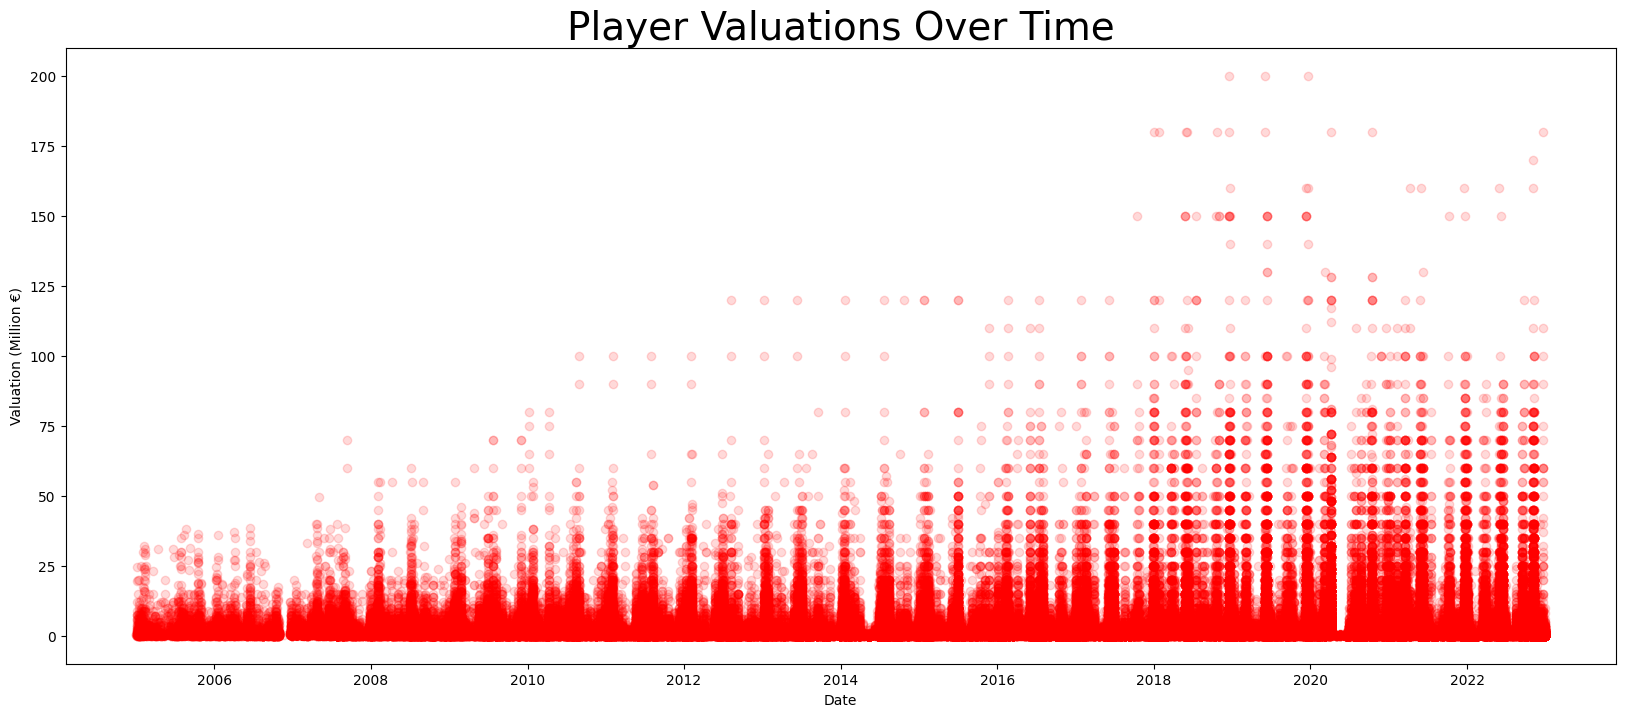

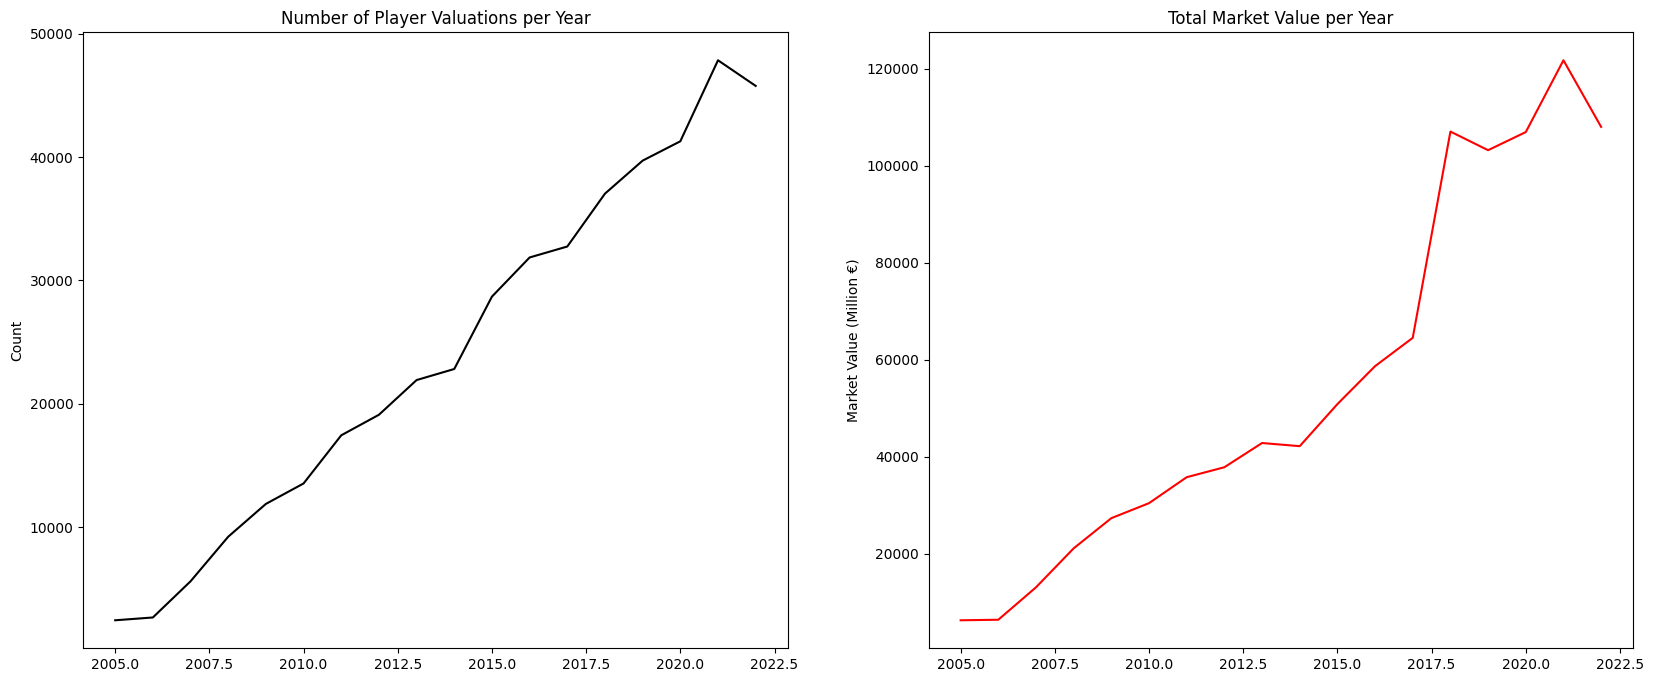

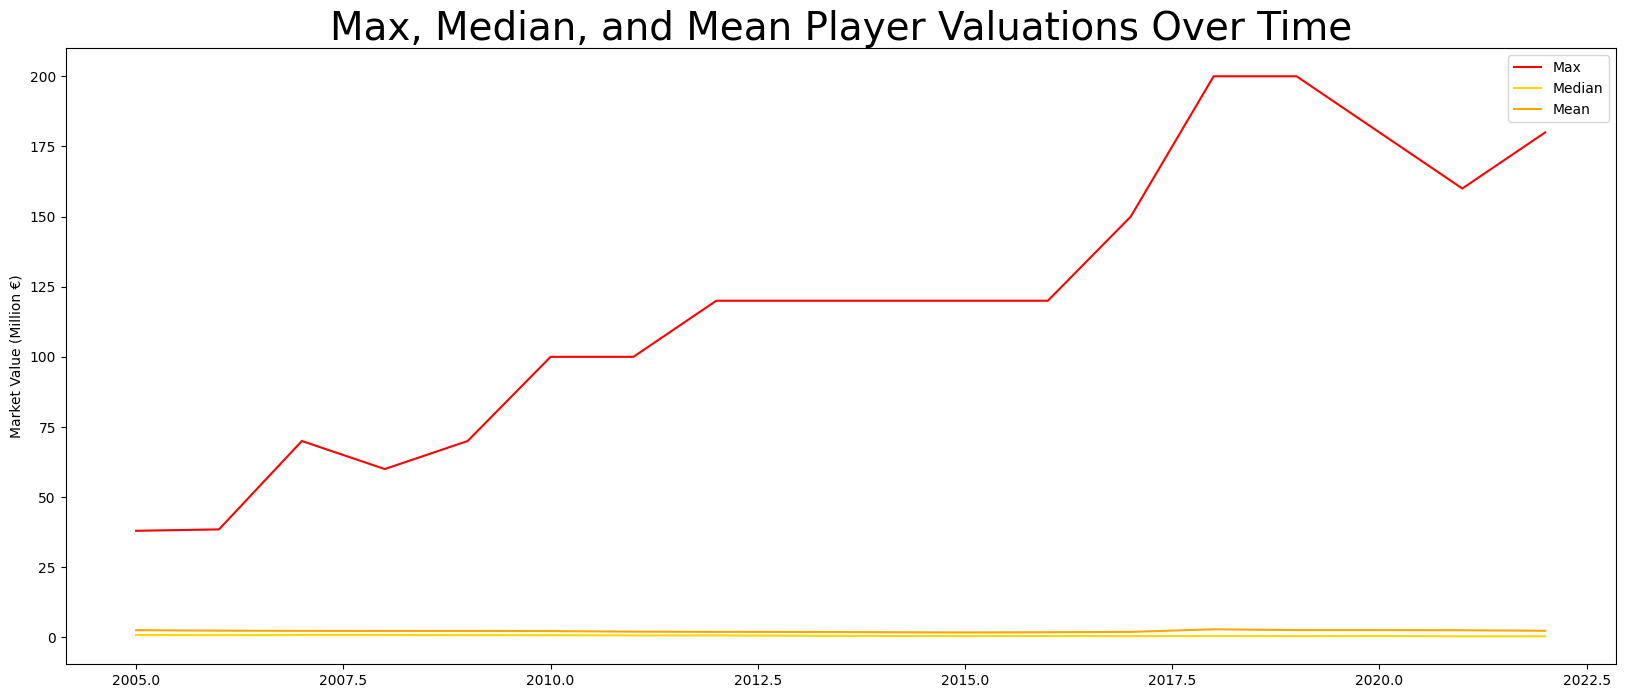

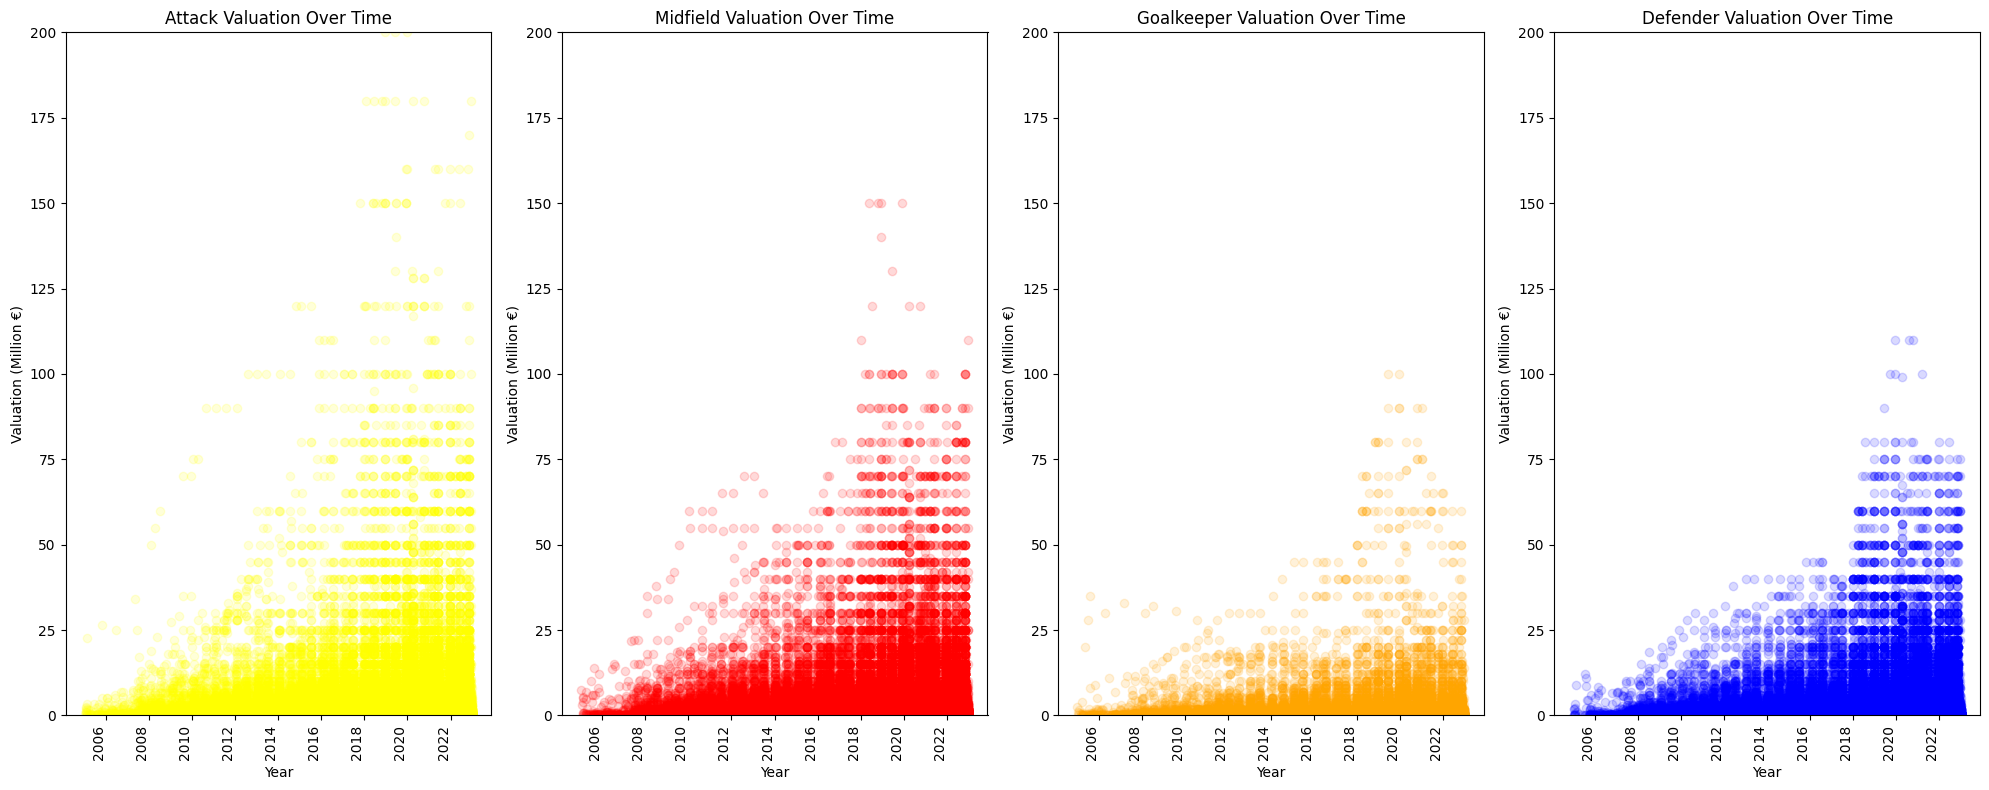

In [16]:
import matplotlib.pyplot as plt

# Filter player valuations between 2005 and 2022
player_valuations_df = player_valuations_df[
    (player_valuations_df['year'] > 2004) & (player_valuations_df['year'] < 2023)
]

# Filter high-value players
high_value_player_valuations_df = player_valuations_df[
    player_valuations_df['market_value_in_eur'] > 40000000
]

# Get unique positions from players_df
positions = players_df['position'].dropna().unique()

# Scatter plot of all player valuations over time
plt.figure(figsize=(20, 8))
plt.scatter(
    player_valuations_df['datetime'],
    player_valuations_df['market_value_in_eur'] / 1e6,
    c='red',
    alpha=0.15
)
plt.xlabel('Date')
plt.ylabel('Valuation (Million €)')
plt.title('Player Valuations Over Time', fontsize=28)
plt.show()

# Grouping data by year
yeargroups_count = player_valuations_df.groupby('year')['market_value_in_eur'].count()
yeargroups_sum = player_valuations_df.groupby('year')['market_value_in_eur'].sum()
yeargroups_max = player_valuations_df.groupby('year')['market_value_in_eur'].max()
yeargroups_min = player_valuations_df.groupby('year')['market_value_in_eur'].min()
yeargroups_median = player_valuations_df.groupby('year')['market_value_in_eur'].median()
yeargroups_mean = player_valuations_df.groupby('year')['market_value_in_eur'].mean()

# Plot count and sum of valuations per year
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.set_title('Number of Player Valuations per Year')
ax1.plot(yeargroups_count.index, yeargroups_count.values, color='black')
ax1.set_ylabel('Count')

ax2.set_title('Total Market Value per Year')
ax2.plot(yeargroups_sum.index, yeargroups_sum.values / 1e6, color='red')
ax2.set_ylabel('Market Value (Million €)')
plt.show()

# Plot max, median, and mean valuations over time
plt.figure(figsize=(20, 8))
plt.title('Max, Median, and Mean Player Valuations Over Time', fontsize=28)
plt.plot(yeargroups_max.index, yeargroups_max.values / 1e6, color='red', label='Max')
plt.plot(yeargroups_median.index, yeargroups_median.values / 1e6, color='gold', label='Median')
plt.plot(yeargroups_mean.index, yeargroups_mean.values / 1e6, color='orange', label='Mean')
plt.ylabel('Market Value (Million €)')
plt.legend()
plt.show()

# Valuation by position
plt.figure(figsize=(20, 8))
colors = ['yellow', 'red', 'orange', 'blue', 'green']
for i, position in enumerate(positions[:4]):  # Limit to 4 positions for subplot layout
    plt.subplot(1, 4, i + 1)
    pos_df = player_valuations_df[player_valuations_df['position'] == position]
    plt.scatter(
        pos_df['datetime'],
        pos_df['market_value_in_eur'] / 1e6,
        c=colors[i % len(colors)],
        alpha=0.15
    )
    plt.xlabel('Year')
    plt.ylabel('Valuation (Million €)')
    plt.title(f'{position} Valuation Over Time')
    plt.ylim(0, 200)
    plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


# Building club influence score

# The club influence score
it is a ranked list of clubs based on their influence score, highlighting the top performers in terms of both on-field and off-field strength.

It begins by aggregating player performance data—such as goals, assists, minutes played, and disciplinary records—at the club level.

This is then merged with club metadata, including squad size, market value, and stadium capacity.

Next, the average, median, and range of player market values are calculated for each club to assess the financial caliber of their squad.

Several influence-related metrics are then computed: the club prestige score (based on total market value, squad size, and number of national team players), international exposure (derived from the percentage of foreign players and squad size), infrastructure score (based on stadium capacity and squad size), and financial health (extracted from the club’s net transfer record).


These metrics are standardized using z-score normalization to ensure comparability.


Finally, the overall club influence score is calculated as a weighted sum of the normalized metrics, with club prestige and financial health each contributing 30%, and international exposure and infrastructure contributing 20% each.



In [ ]:
# Calculate club performance metrics
club_performance = appearances_df.groupby('player_club_id').agg({
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum',
    'yellow_cards': 'sum',
    'red_cards': 'sum'
}).reset_index()

# Rename the column to match clubs.csv
club_performance = club_performance.rename(columns={'player_club_id': 'club_id'})

# Merge club performance with club information
club_metrics = pd.merge(
    clubs_df,
    club_performance,
    how='left',
    on='club_id'
)

# Calculate average player value per club
club_player_values = player_valuations_df.groupby('current_club_id')['market_value_in_eur'].agg([
    'mean',
    'median',
    'max',
    'min',
    'count'
]).reset_index()

club_player_values.columns = [
    'club_id',
    'avg_player_value',
    'median_player_value',
    'max_player_value',
    'min_player_value',
    'player_count'
]

# Merge club metrics with player values
club_metrics = pd.merge(
    club_metrics,
    club_player_values,
    how='left',
    on='club_id'
)

# Calculate club influence metrics
club_metrics['club_prestige_score'] = (
    club_metrics['total_market_value'].fillna(0) *
    club_metrics['squad_size'].fillna(0) *
    (1 + club_metrics['national_team_players'].fillna(0) / club_metrics['squad_size'].fillna(1))
)

club_metrics['international_exposure'] = (
    club_metrics['foreigners_percentage'].fillna(0) *
    club_metrics['squad_size'].fillna(0)
)

club_metrics['infrastructure_score'] = (
    club_metrics['stadium_seats'].fillna(0) *
    (1 + club_metrics['squad_size'].fillna(0) / 25)
)

club_metrics['financial_health'] = (
    club_metrics['net_transfer_record'].str.extract(r'([-+]?\d+\.?\d*)').astype(float) * 1000000
)

# Normalize metrics
scaler = StandardScaler()
metrics_to_normalize = [
    'club_prestige_score',
    'international_exposure',
    'infrastructure_score',
    'financial_health',
    'avg_player_value'
]

for metric in metrics_to_normalize:
    if metric in club_metrics.columns:
        club_metrics[f'{metric}_normalized'] = scaler.fit_transform(
            club_metrics[[metric]].fillna(0)
        )

# Calculate overall club influence score
club_metrics['club_influence_score'] = (
    club_metrics['club_prestige_score_normalized'] * 0.3 +
    club_metrics['international_exposure_normalized'] * 0.2 +
    club_metrics['infrastructure_score_normalized'] * 0.2 +
    club_metrics['financial_health_normalized'] * 0.3
)

print("\nTop 10 clubs by influence score:")
print(club_metrics.nlargest(10, 'club_influence_score')[['name', 'club_influence_score', 'club_prestige_score']])


Top 10 clubs by influence score:
                                      name  club_influence_score  \
426                           Leeds United              1.667373   
77   Real Valladolid Club de Fútbol S.A.D.              1.608031   
175                              Málaga CF              1.311716   
202                    Queens Park Rangers              1.309037   
28                          MKE Ankaragücü              1.304781   
1                       Ural Yekaterinburg              1.235049   
394                     Fortuna Düsseldorf              1.232840   
95                         Odense Boldklub              1.211382   
360                 Eintracht Braunschweig              1.052821   
392                    Panserraikos Serres              0.922527   

     club_prestige_score  
426                  0.0  
77                   0.0  
175                  0.0  
202                  0.0  
28                   0.0  
1                    0.0  
394                  0.0  
9

#  players headcount per country


Headcount of Players by Country of Citizenship:
            Country  Headcount
0             Spain       1965
1             Italy       1887
2            France       1761
3            Brazil       1629
4           England       1588
..              ...        ...
178    Sint Maarten          1
179         Bahrain          1
180         Andorra          1
181       Singapore          1
182  Southern Sudan          1

[183 rows x 2 columns]


/tmp/ipython-input-8-2413329099.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Headcount', y='Country', data=country_headcount.nlargest(20, 'Headcount'), palette='viridis')


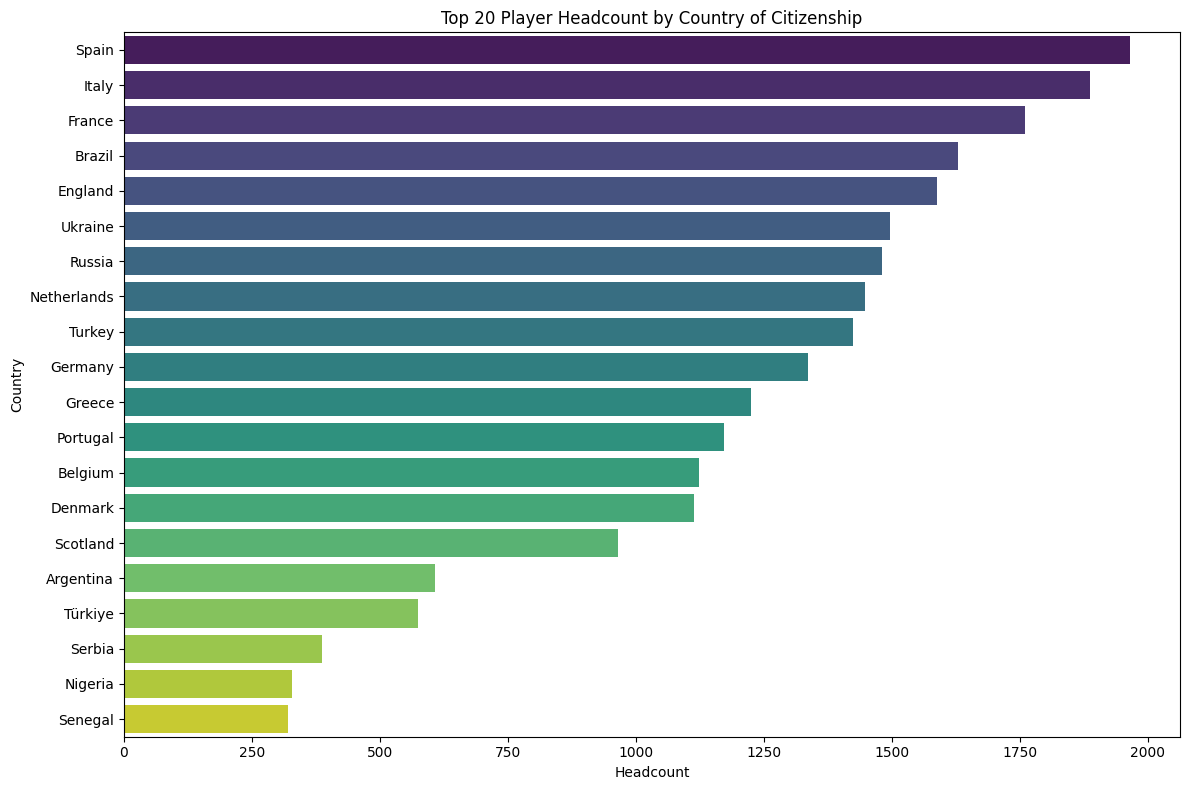

In [ ]:
# Calculate headcount for each country of origin
country_headcount = players_df['country_of_citizenship'].value_counts().reset_index()
country_headcount.columns = ['Country', 'Headcount']

print("\nHeadcount of Players by Country of Citizenship:")
print(country_headcount)

# You can also visualize this
plt.figure(figsize=(12, 8))
# Plotting the top 20 countries for better visualization
sns.barplot(x='Headcount', y='Country', data=country_headcount.nlargest(20, 'Headcount'), palette='viridis')
plt.title('Top 20 Player Headcount by Country of Citizenship')
plt.xlabel('Headcount')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Age group


Headcount of Players by Age Group:
    Age Group  Headcount
4  younger-18         63
1       18-24       7613
0       25-34      16852
2       35-44       7357
3    45-older        669


/tmp/ipython-input-9-865865920.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Headcount', data=age_group_headcount, palette='pastel')


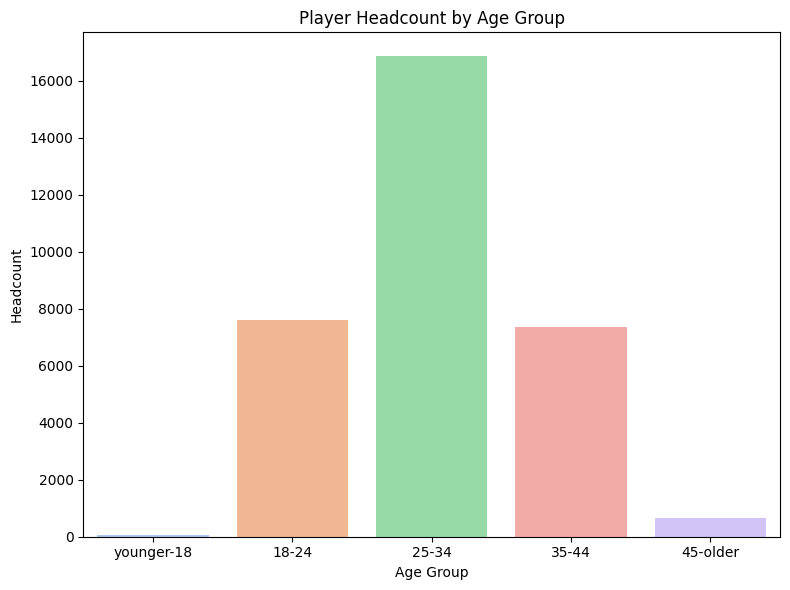

In [ ]:
# Ensure 'age' column is calculated
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
current_date = datetime.now()
players_df['age'] = players_df['date_of_birth'].apply(lambda dob: (current_date - dob).days / 365.25)

# Define age groups with the new category
age_bins = [0, 18, 25, 35, 45, players_df['age'].max() + 1]  # Add a bin starting from 0 up to 18 (exclusive)
age_labels = ['younger-18', '18-24', '25-34', '35-44', '45-older']

# Create a new column for age groups
players_df['age_group'] = pd.cut(players_df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True) # Include the lowest bound (0)

# Calculate headcount for each age group
age_group_headcount = players_df['age_group'].value_counts().reset_index()
age_group_headcount.columns = ['Age Group', 'Headcount']

# Sort the age groups for better visualization
age_group_headcount['Age Group'] = pd.Categorical(age_group_headcount['Age Group'], categories=age_labels, ordered=True)
age_group_headcount = age_group_headcount.sort_values('Age Group')


print("\nHeadcount of Players by Age Group:")
print(age_group_headcount)

# Visualize the age group distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Headcount', data=age_group_headcount, palette='pastel')
plt.title('Player Headcount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Headcount')
plt.tight_layout()
plt.show()

# Influence score per club and headcount per club


Calculating club influence and player count for 2020...

Calculating club influence and player count for 2021...

Calculating club influence and player count for 2022...

Calculating club influence and player count for 2023...

Calculating club influence and player count for 2024...


/tmp/ipython-input-10-563314517.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='club_influence_score', y='name', data=top_clubs_influence_by_year[year], palette='viridis')
/tmp/ipython-input-10-563314517.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='club_influence_score', y='name', data=top_clubs_influence_by_year[year], palette='viridis')
/tmp/ipython-input-10-563314517.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='club_influence_score', y='name', data=top_clubs_influence_by_year[year], palette='viridis')
/tmp

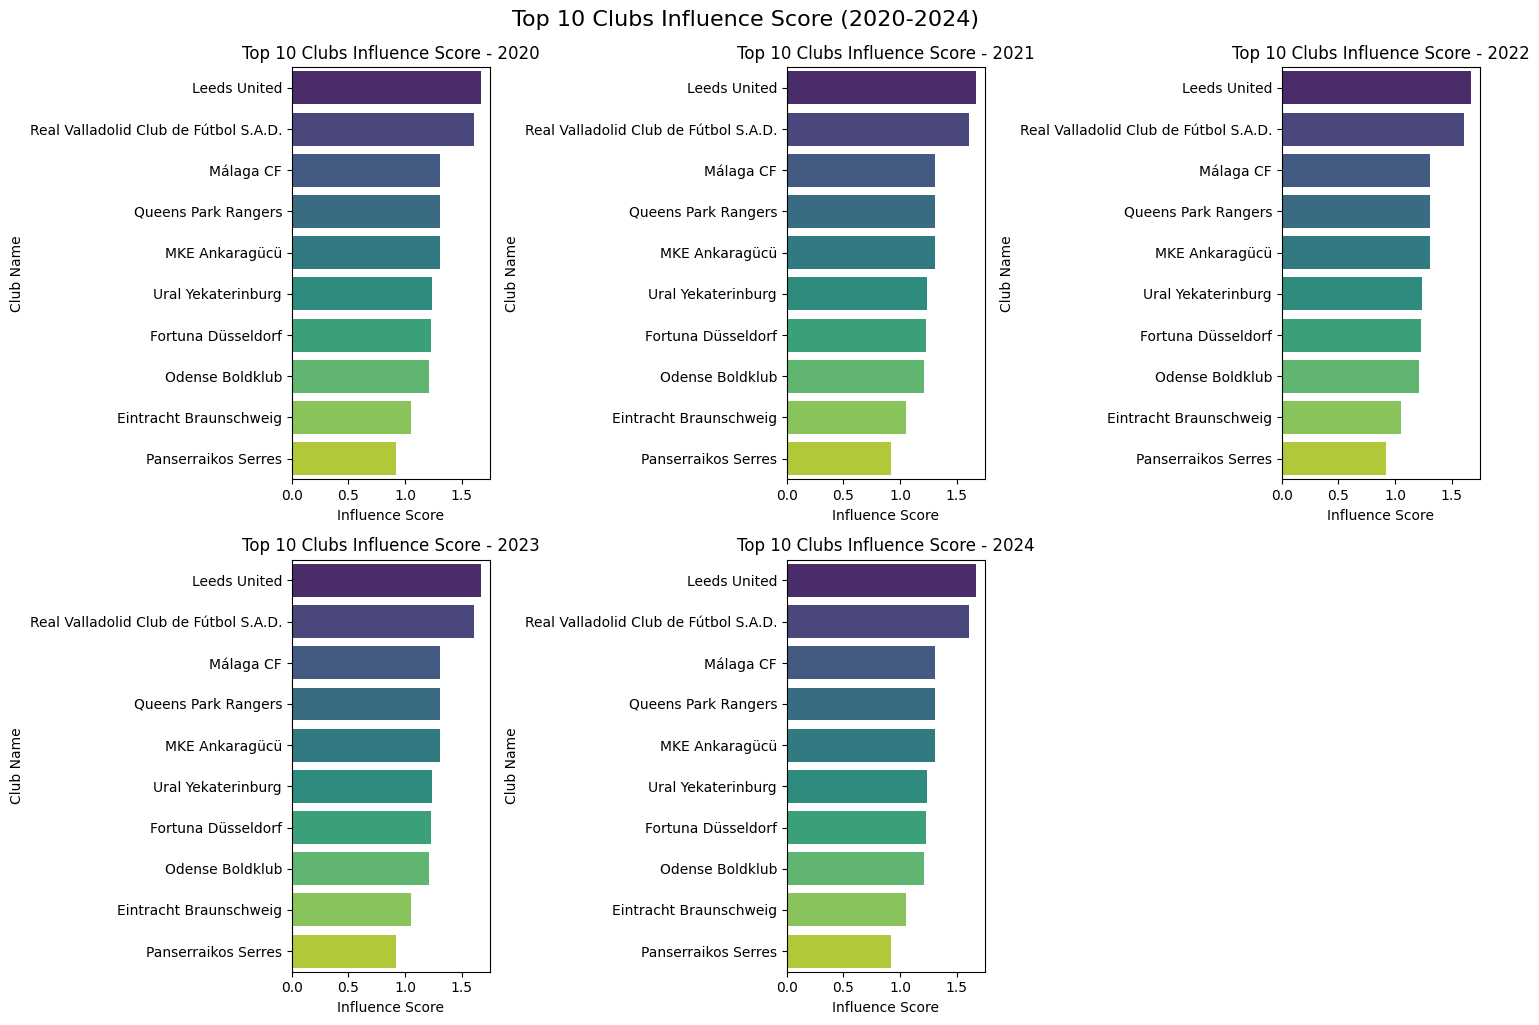

/tmp/ipython-input-10-563314517.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_count', y='name', data=top_10_player_count, palette='magma')
/tmp/ipython-input-10-563314517.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_count', y='name', data=top_10_player_count, palette='magma')
/tmp/ipython-input-10-563314517.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_count', y='name', data=top_10_player_count, palette='magma')
/tmp/ipython-input-10-563314517.py:141: FutureWarning: 

Passing `palette` w

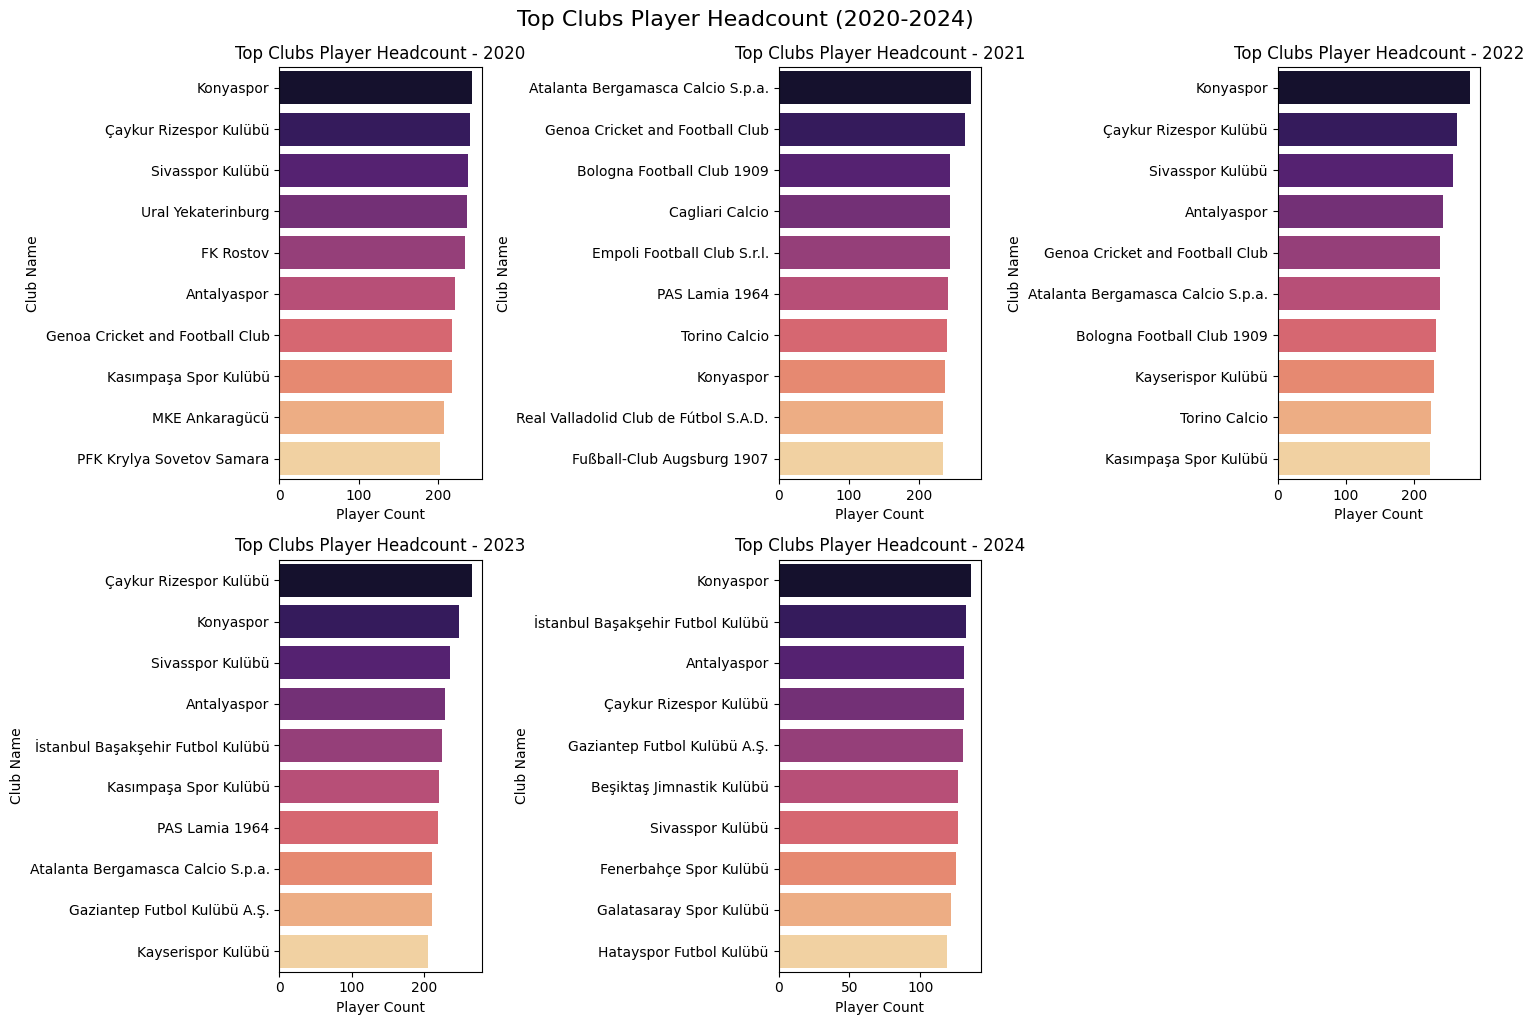


Top 10 Clubs by Influence Score in 2020:
     club_id                                   name  club_influence_score  \
426      399                           Leeds United              1.667373   
77       366  Real Valladolid Club de Fútbol S.A.D.              1.608031   
175     1084                              Málaga CF              1.311716   
202     1039                    Queens Park Rangers              1.309037   
28       868                         MKE Ankaragücü              1.304781   
1      11127                     Ural Yekaterinburg              1.235049   
394       38                     Fortuna Düsseldorf              1.232840   
95       173                        Odense Boldklub              1.211382   
360       23                 Eintracht Braunschweig              1.052821   
392     3385                    Panserraikos Serres              0.922527   

     player_count  
426          68.0  
77          150.0  
175          26.0  
202           5.0  
28        

In [ ]:
# prompt: based on the result above. can you build graph of top 10 clubs_influence_score for earch year 2020, 2021, 2022, 2023, 2024. Also do players headcount for each clubs

# To analyze trends over time, we need to incorporate the 'date' information from player_valuations_df.
# We'll use the 'date' column from player_valuations to determine the year for influence score.

# Function to calculate club influence score for a given year
def calculate_club_influence_for_year(year, player_valuations_df, clubs_df):
    # Filter valuations for the specific year
    valuations_year = player_valuations_df[pd.to_datetime(player_valuations_df['date']).dt.year == year].copy()

    # Calculate average player value per club for the year
    club_player_values_year = valuations_year.groupby('current_club_id')['market_value_in_eur'].agg([
        'mean',
        'median',
        'max',
        'min',
        'count'
    ]).reset_index()

    club_player_values_year.columns = [
        'club_id',
        'avg_player_value',
        'median_player_value',
        'max_player_value',
        'min_player_value',
        'player_count'
    ]

    # Merge with club information
    club_metrics_year = pd.merge(
        clubs_df,
        club_player_values_year,
        how='left',
        left_on='club_id',  # Use club_id from clubs_df
        right_on='club_id'  # Use club_id from club_player_values_year
    )

    # Calculate club influence metrics
    club_metrics_year['club_prestige_score'] = (
        club_metrics_year['total_market_value'].fillna(0) *
        club_metrics_year['squad_size'].fillna(0) *
        (1 + club_metrics_year['national_team_players'].fillna(0) / club_metrics_year['squad_size'].fillna(1))
    )

    club_metrics_year['international_exposure'] = (
        club_metrics_year['foreigners_percentage'].fillna(0) *
        club_metrics_year['squad_size'].fillna(0)
    )

    club_metrics_year['infrastructure_score'] = (
        club_metrics_year['stadium_seats'].fillna(0) *
        (1 + club_metrics_year['squad_size'].fillna(0) / 25)
    )

    # Handle potential errors in net_transfer_record conversion
    club_metrics_year['financial_health'] = club_metrics_year['net_transfer_record'].str.extract(r'([-+]?\d+\.?\d*)').astype(float).fillna(0) * 1000000


    # Normalize metrics - only if there's data for the year
    metrics_to_normalize = [
        'club_prestige_score',
        'international_exposure',
        'infrastructure_score',
        'financial_health',
        'avg_player_value'
    ]

    scaler = StandardScaler()
    for metric in metrics_to_normalize:
        if metric in club_metrics_year.columns:
            if not club_metrics_year[metric].isnull().all(): # Check if the column has any non-null values
                club_metrics_year[f'{metric}_normalized'] = scaler.fit_transform(
                    club_metrics_year[[metric]].fillna(club_metrics_year[metric].median()) # Use median for imputation
                )
            else:
                club_metrics_year[f'{metric}_normalized'] = 0 # Assign 0 if all values are null


    # Calculate overall club influence score
    club_metrics_year['club_influence_score'] = (
        club_metrics_year['club_prestige_score_normalized'] * 0.3 +
        club_metrics_year['international_exposure_normalized'] * 0.2 +
        club_metrics_year['infrastructure_score_normalized'] * 0.2 +
        club_metrics_year['financial_health_normalized'] * 0.3
    )

    return club_metrics_year[['club_id', 'name', 'club_influence_score', 'player_count']]

# Years to analyze
years = [2020, 2021, 2022, 2023, 2024]

# Store top clubs and player counts for each year
top_clubs_influence_by_year = {}
club_player_counts_by_year = {}

for year in years:
    print(f"\nCalculating club influence and player count for {year}...")
    club_metrics_year = calculate_club_influence_for_year(year, player_valuations_df, clubs_df)

    # Get top 10 by influence score
    top_10_influence = club_metrics_year.nlargest(10, 'club_influence_score').copy()
    top_clubs_influence_by_year[year] = top_10_influence

    # Get player counts for all clubs with data in that year
    player_counts = club_metrics_year[['club_id', 'name', 'player_count']].dropna(subset=['player_count']).copy()
    club_player_counts_by_year[year] = player_counts

# --- Plotting ---

# Plotting Top 10 Clubs Influence Score per Year
plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    if year in top_clubs_influence_by_year and not top_clubs_influence_by_year[year].empty:
        plt.subplot(2, 3, i + 1)
        sns.barplot(x='club_influence_score', y='name', data=top_clubs_influence_by_year[year], palette='viridis')
        plt.title(f'Top 10 Clubs Influence Score - {year}')
        plt.xlabel('Influence Score')
        plt.ylabel('Club Name')
        plt.tight_layout()
    else:
        plt.subplot(2, 3, i + 1)
        plt.title(f'No data for {year}')
        plt.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.axis('off')


plt.suptitle('Top 10 Clubs Influence Score (2020-2024)', y=1.02, fontsize=16)
plt.show()

# Plotting Player Headcount for Top Clubs (or maybe clubs with most players) per Year
# Let's plot player headcount for clubs with the most players in each year
plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    if year in club_player_counts_by_year and not club_player_counts_by_year[year].empty:
        # Get top clubs by player count for plotting
        top_10_player_count = club_player_counts_by_year[year].nlargest(10, 'player_count').copy()

        plt.subplot(2, 3, i + 1)
        sns.barplot(x='player_count', y='name', data=top_10_player_count, palette='magma')
        plt.title(f'Top Clubs Player Headcount - {year}')
        plt.xlabel('Player Count')
        plt.ylabel('Club Name')
        plt.tight_layout()
    else:
        plt.subplot(2, 3, i + 1)
        plt.title(f'No player count data for {year}')
        plt.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.axis('off')

plt.suptitle('Top Clubs Player Headcount (2020-2024)', y=1.02, fontsize=16)
plt.show()

# You can also print the top 10 lists if needed
for year in years:
    print(f"\nTop 10 Clubs by Influence Score in {year}:")
    if year in top_clubs_influence_by_year and not top_clubs_influence_by_year[year].empty:
        print(top_clubs_influence_by_year[year])
    else:
        print("No data available.")

    print(f"\nClubs with Most Players in {year}:")
    if year in club_player_counts_by_year and not club_player_counts_by_year[year].empty:
        # Print top 10 player counts
        print(club_player_counts_by_year[year].nlargest(10, 'player_count'))
    else:
        print("No data available.")

# Players position market value II




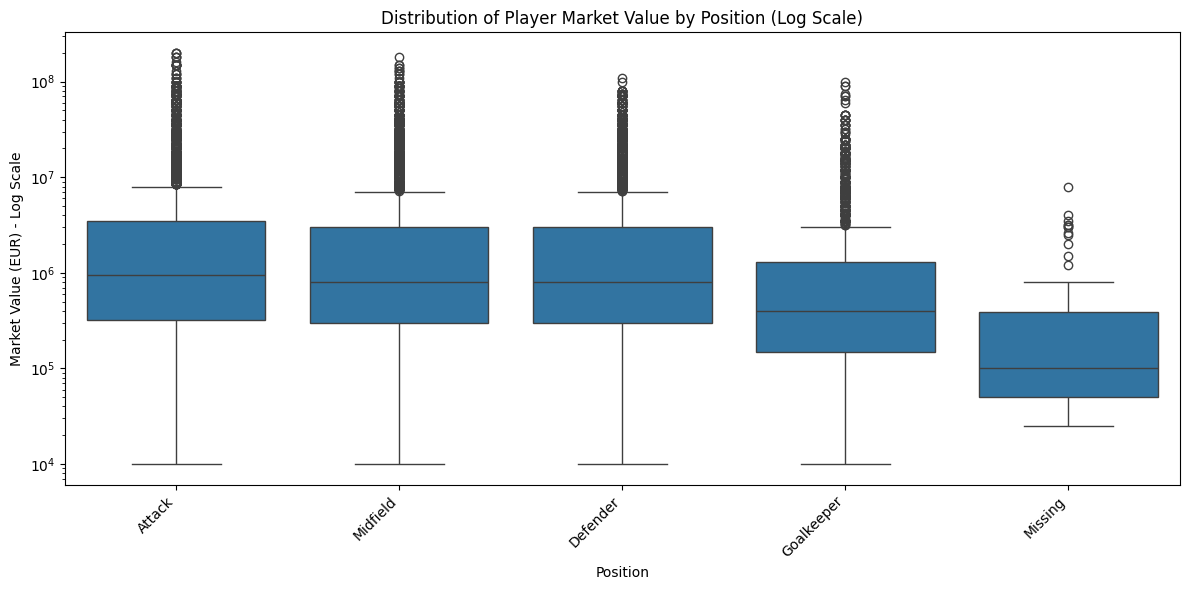

In [ ]:
# prompt: can you do the distribution of player market value  based on the position of the players and create headcount how many of each position in the dataset

# Merge player data with valuation data
player_valuation_position = pd.merge(
    players_df[['player_id', 'position']],
    player_valuations_df[['player_id', 'market_value_in_eur']],
    on='player_id',
    how='inner' # Use inner merge to keep only players with valuation data
)
# Remove duplicates in player_valuation_position based on player_id (keep the latest valuation if multiple)
player_valuation_position = player_valuation_position.sort_values(by='market_value_in_eur', ascending=False).drop_duplicates(subset=['player_id'])
# Plot the distribution of market value based on position
# Plot the distribution of market value based on position with logarithmic scale
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='market_value_in_eur', data=player_valuation_position)
plt.title('Distribution of Player Market Value by Position (Log Scale)')
plt.xlabel('Position')
plt.ylabel('Market Value (EUR) - Log Scale')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.tight_layout()
plt.show()


# Dealing with players



Players DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             32601 non-null  int64         
 1   first_name                            30539 non-null  object        
 2   last_name                             32601 non-null  object        
 3   name                                  32601 non-null  object        
 4   last_season                           32601 non-null  int64         
 5   current_club_id                       32601 non-null  int64         
 6   player_code                           32601 non-null  object        
 7   country_of_birth                      29802 non-null  object        
 8   city_of_birth                         30146 non-null  object        
 9   country_of_citizenship                32218 non

/tmp/ipython-input-12-1029777868.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='foot', data=players_df, palette='pastel')


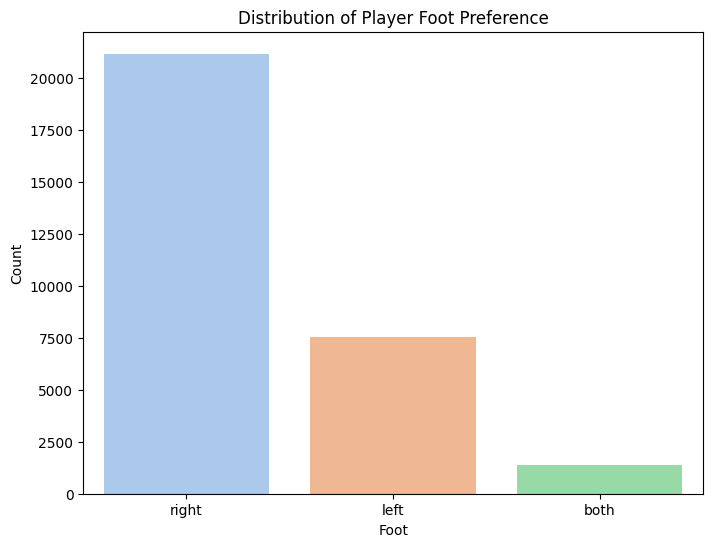

/tmp/ipython-input-12-1029777868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='position', data=players_df, order=players_df['position'].value_counts().index, palette='viridis')


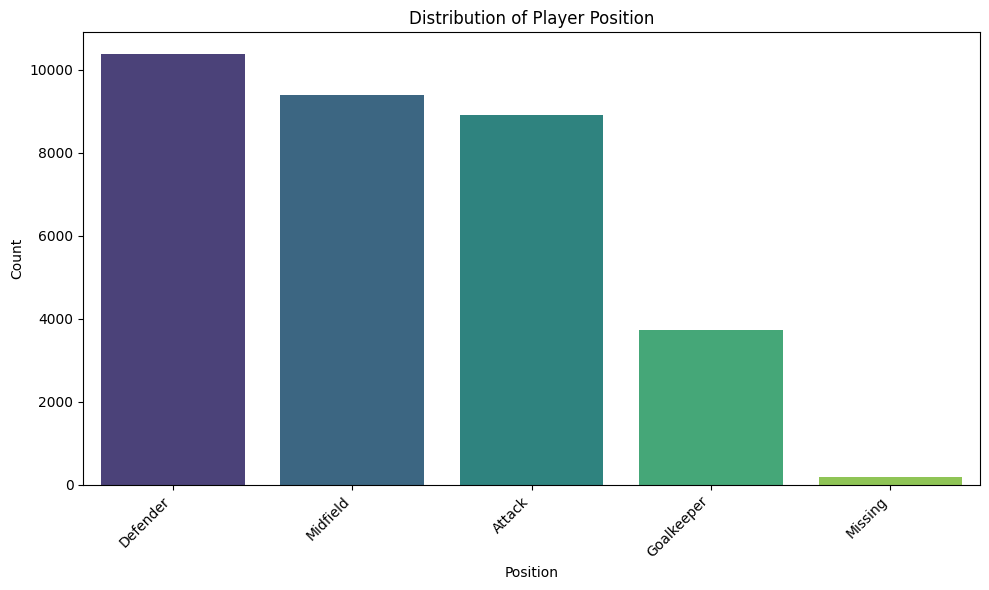

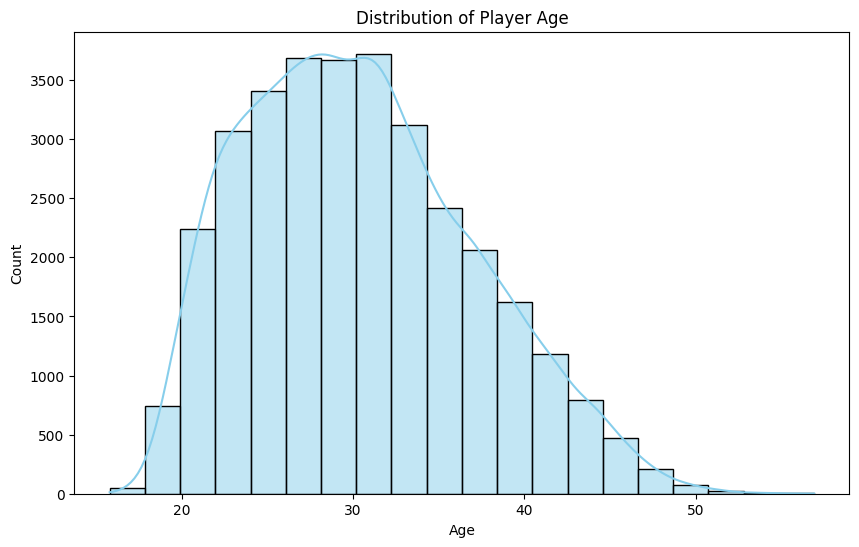

In [ ]:
# prompt: players_df = dataframes.get("players")
# i have players df i want to analyse everything and graph pls

# Basic Analysis of players_df
print("\nPlayers DataFrame Info:")
players_df.info()

print("\nPlayers DataFrame Head:")
print(players_df.head())

print("\nPlayers DataFrame Describe:")
print(players_df.describe())

# Distribution of player foot
plt.figure(figsize=(8, 6))
sns.countplot(x='foot', data=players_df, palette='pastel')
plt.title('Distribution of Player Foot Preference')
plt.xlabel('Foot')
plt.ylabel('Count')
plt.show()

# Distribution of player position
plt.figure(figsize=(10, 6))
sns.countplot(x='position', data=players_df, order=players_df['position'].value_counts().index, palette='viridis')
plt.title('Distribution of Player Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of player age (requires birth_date)
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
current_date = datetime.now()
players_df['age'] = players_df['date_of_birth'].apply(lambda dob: (current_date - dob).days / 365.25)

plt.figure(figsize=(10, 6))
sns.histplot(players_df['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




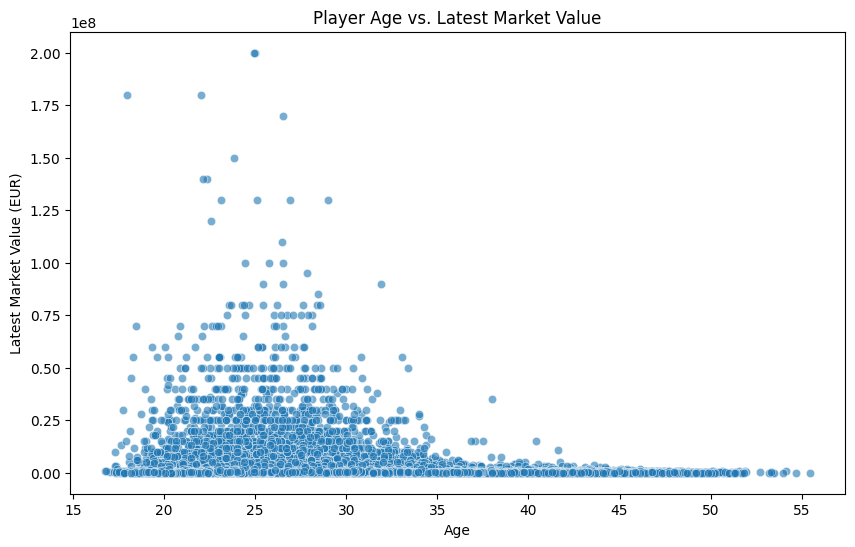

/tmp/ipython-input-13-338346618.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = player_age_group_value.groupby('age_group')['market_value_in_eur'].agg(['mean', 'count', 'max', 'min']).reset_index()
/tmp/ipython-input-13-338346618.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age Group', y='Average Market Value', data=age_group_summary, order=age_group_order, palette='pastel')


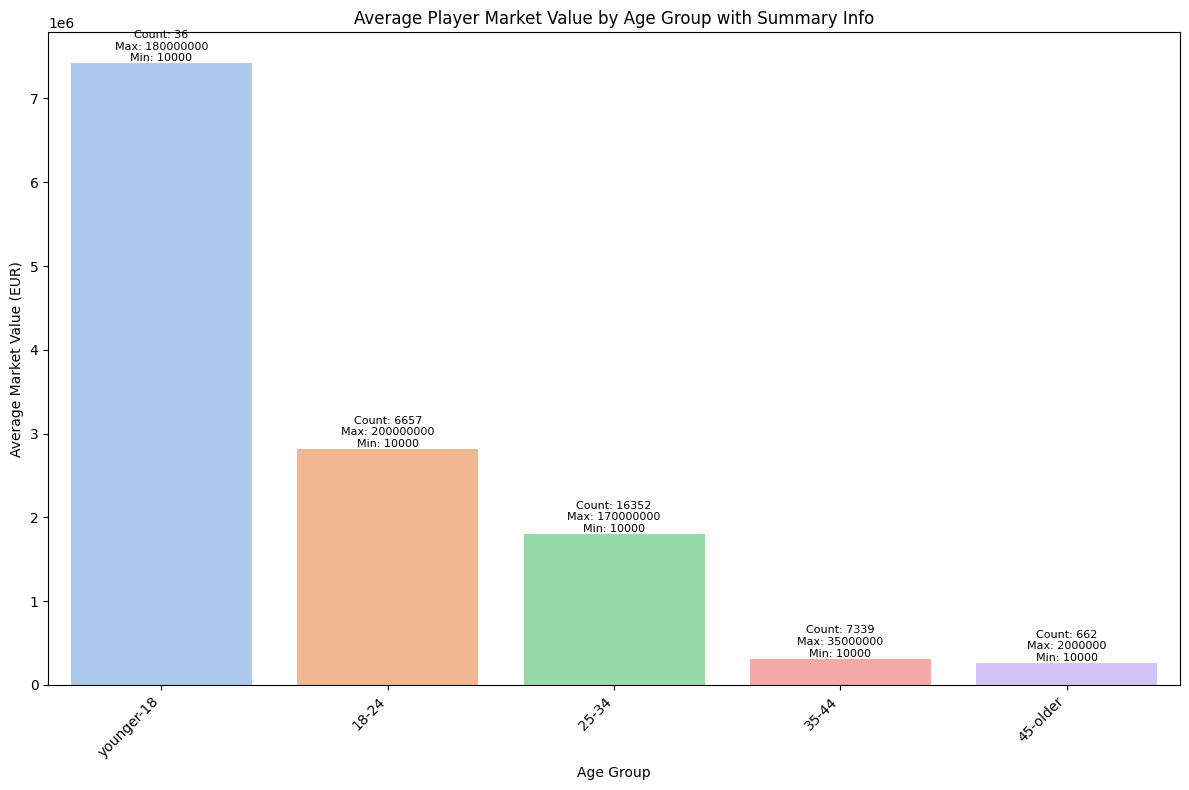

In [ ]:
# Relationship between age and market value (requires merging with player_valuations_df)
# Use the latest market value for each player
latest_valuations = player_valuations_df.sort_values(by='date', ascending=False).drop_duplicates(subset=['player_id'])
player_age_value = pd.merge(
    players_df[['player_id', 'age']].dropna(),
    latest_valuations[['player_id', 'market_value_in_eur']],
    on='player_id',
    how='inner'
)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='market_value_in_eur', data=player_age_value, alpha=0.6)
plt.title('Player Age vs. Latest Market Value')
plt.xlabel('Age')
plt.ylabel('Latest Market Value (EUR)')
plt.show()

# Ensure 'age_group' column is created with the desired age groups
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
current_date = datetime.now()
players_df['age'] = players_df['date_of_birth'].apply(lambda dob: (current_date - dob).days / 365.25)

age_bins = [0, 18, 25, 35, 45, players_df['age'].max() + 1]
age_labels = ['younger-18', '18-24', '25-34', '35-44', '45-older']
players_df['age_group'] = pd.cut(players_df['age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Use the latest market value for each player
latest_valuations = player_valuations_df.sort_values(by='date', ascending=False).drop_duplicates(subset=['player_id'])

# Merge with player data including the 'age_group'
player_age_group_value = pd.merge(
    players_df[['player_id', 'age_group']].dropna(subset=['age_group']), # Drop players with no age group (e.g., missing DOB)
    latest_valuations[['player_id', 'market_value_in_eur']],
    on='player_id',
    how='inner'
)

# Calculate the average, headcount, highest, and lowest market value for each age group
age_group_summary = player_age_group_value.groupby('age_group')['market_value_in_eur'].agg(['mean', 'count', 'max', 'min']).reset_index()
age_group_summary.columns = ['Age Group', 'Average Market Value', 'Headcount', 'Highest Market Value', 'Lowest Market Value']

# Define the order of age groups for the plot
age_group_order = ['younger-18', '18-24', '25-34', '35-44', '45-older']

# Ensure the summary DataFrame is in the correct order
age_group_summary['Age Group'] = pd.Categorical(age_group_summary['Age Group'], categories=age_group_order, ordered=True)
age_group_summary = age_group_summary.sort_values('Age Group')


# Plot the average market value by age group using a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Age Group', y='Average Market Value', data=age_group_summary, order=age_group_order, palette='pastel')
plt.title('Average Player Market Value by Age Group with Summary Info')
plt.xlabel('Age Group')
plt.ylabel('Average Market Value (EUR)')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for index, row in age_group_summary.iterrows():
    ax.text(index, row['Average Market Value'],
            f"Count: {row['Headcount']}\nMax: {row['Highest Market Value']:.0f}\nMin: {row['Lowest Market Value']:.0f}",
            color='black', ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Ensure 'age' column is calculated
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])
current_date = datetime.now()
players_df['age'] = players_df['date_of_birth'].apply(lambda dob: (current_date - dob).days / 365.25)

# Filter players under 18 years old
players_under_18 = players_df[players_df['age'] < 18].copy()

# Use the latest market value for each player
latest_valuations = player_valuations_df.sort_values(by='date', ascending=False).drop_duplicates(subset=['player_id'])

# Merge players under 18 with their latest market valuations
players_under_18_with_value = pd.merge(
    players_under_18[['player_id', 'name', 'age']],
    latest_valuations[['player_id', 'market_value_in_eur']],
    on='player_id',
    how='inner' # Use inner merge to only include players with valuation data
)

# Sort by market value for better readability (optional)
players_under_18_with_value = players_under_18_with_value.sort_values(by='market_value_in_eur', ascending=False)

print("\nPlayers Under 18 and Their Latest Market Value:")
print(players_under_18_with_value)


Players Under 18 and Their Latest Market Value:
    player_id                   name        age  market_value_in_eur
0      937958           Lamine Yamal  17.963039            180000000
17    1097139         Ayyoub Bouaddi  17.741273             30000000
6     1011147            Mikey Moore  17.883641             15000000
4      990148  Konstantinos Karetsas  17.609856             13000000
11    1058368      Francesco Camarda  17.303217             10000000
16    1077175          Honest Ahanor  17.347023              3000000
18    1105532           Jorthy Mokio  17.330595              3000000
27    1185888          Ibrahim Mbaye  17.429158              2000000
28    1186563           Semm Renders  17.533196              1000000
10    1058354           Matteo Palma  17.295003              1000000
1      962125           Buba Sangaré  17.897331              1000000
3      981541         Brad Manguelle  17.587953               800000
31    1200419      Djylian N'Guessan  16.829569       

# Best player 2020-2024

/tmp/ipython-input-15-1988624848.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_value_in_eur', y='name', data=top_valued_players_year, palette='plasma')
/tmp/ipython-input-15-1988624848.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_value_in_eur', y='name', data=top_valued_players_year, palette='plasma')
/tmp/ipython-input-15-1988624848.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_value_in_eur', y='name', data=top_valued_players_year, palette='plasma')
/tmp/ipython-input-15-1988624848.py:26: 

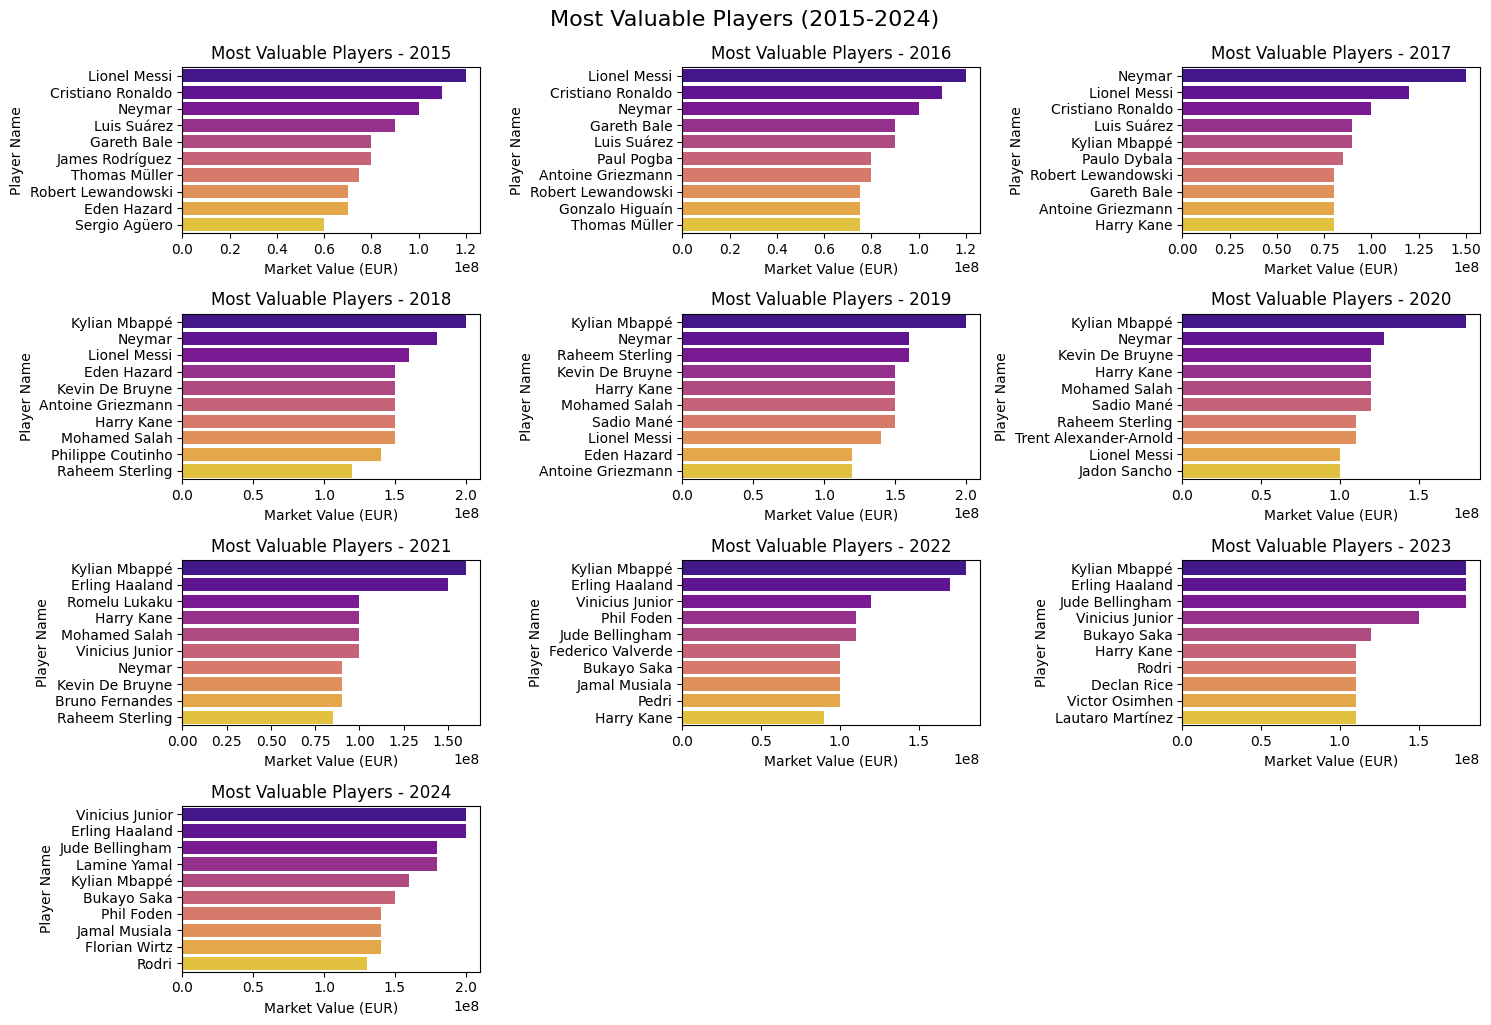

In [ ]:
# Years to analyze
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

for i, year in enumerate(years):
    # Add a subplot for each year
    plt.subplot(4, 3, i + 1)  # 2 rows, 3 columns, plot number i+1

    # Filter valuations for the specific year
    valuations_year = player_valuations_df[pd.to_datetime(player_valuations_df['date']).dt.year == year].copy()

    if not valuations_year.empty:
        # Get the latest valuation for each player in that year
        latest_valuations_year = valuations_year.sort_values(by='date', ascending=False).drop_duplicates(subset=['player_id'])

        # Merge with player data and get top 10 by market value
        top_valued_players_year = pd.merge(
            players_df[['player_id', 'name', 'position']],
            latest_valuations_year[['player_id', 'market_value_in_eur']],
            on='player_id',
            how='inner'
        ).nlargest(10, 'market_value_in_eur')

        if not top_valued_players_year.empty:
            sns.barplot(x='market_value_in_eur', y='name', data=top_valued_players_year, palette='plasma')
            plt.title(f'Most Valuable Players - {year}')
            plt.xlabel('Market Value (EUR)')
            plt.ylabel('Player Name')
        else:
            plt.title(f'No data for {year}')
            plt.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
            plt.axis('off') # Hide axis for empty plots
    else:
        plt.title(f'No data for {year}')
        plt.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        plt.axis('off') # Hide axis for empty plots

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.suptitle('Most Valuable Players (2015-2024)', y=1.02, fontsize=16) # Add a super title
plt.show()

# **Distribution of players based on Height**

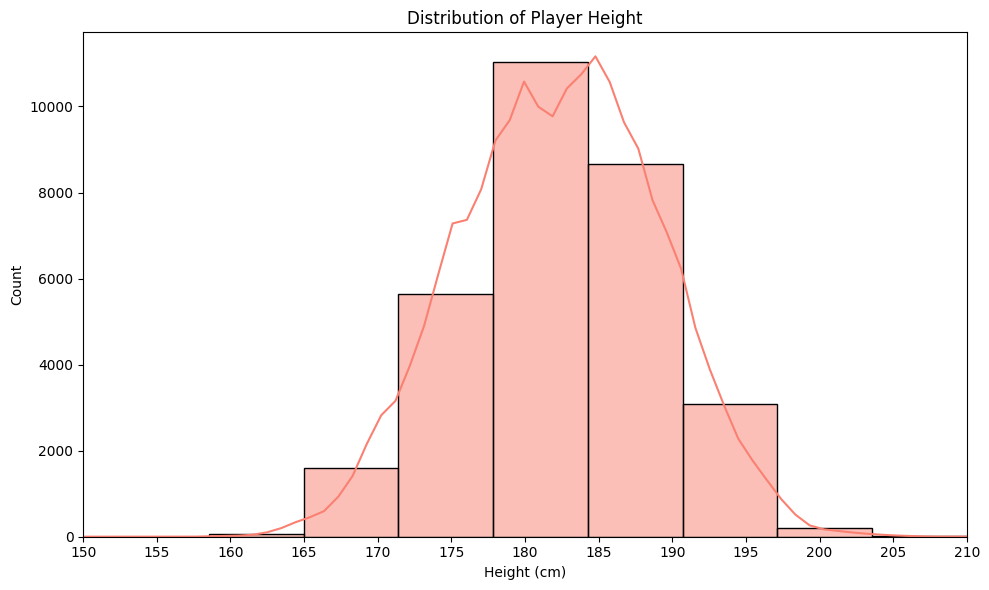

/tmp/ipython-input-16-543637597.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='position', y='height_in_cm', data=players_df, palette='viridis')


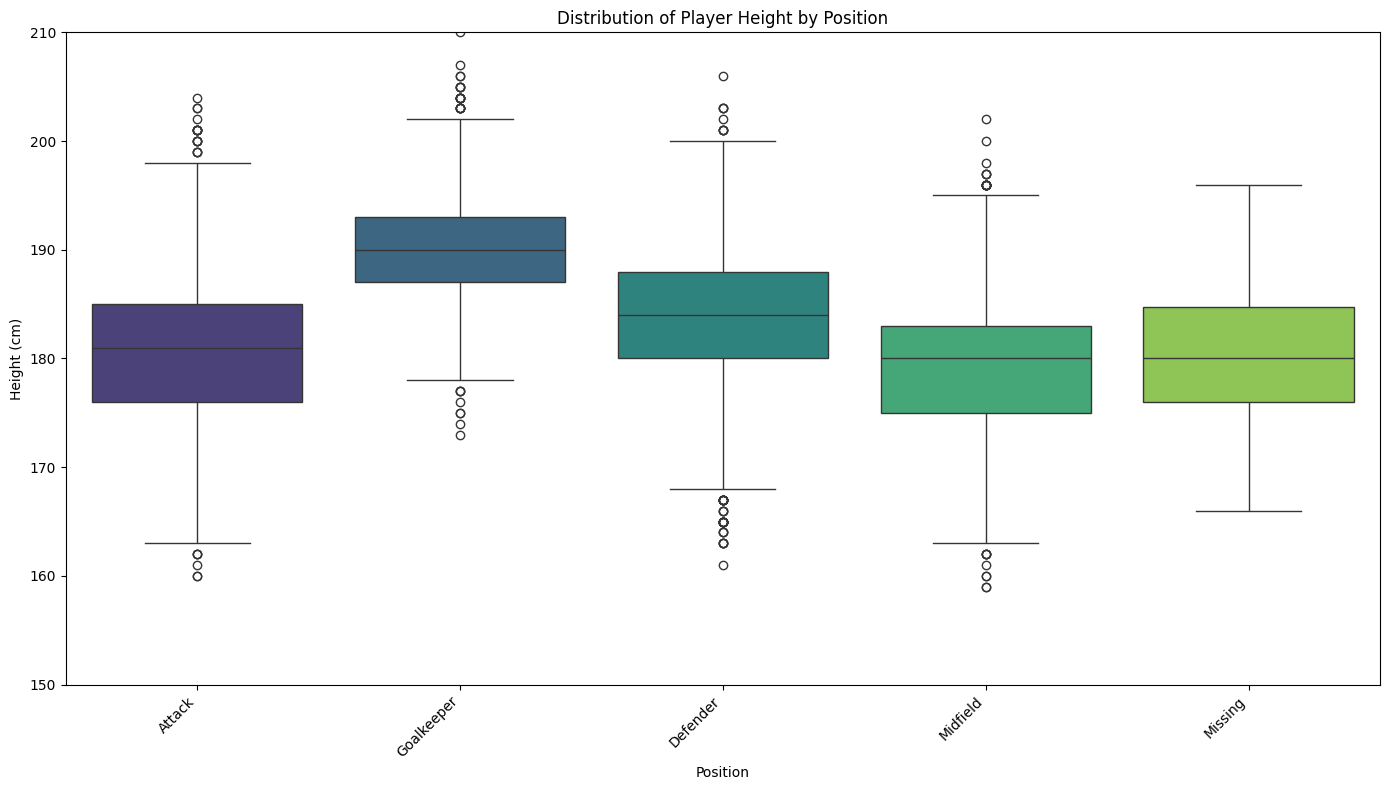

In [ ]:
# prompt: based on analysis above can you also do players distribution based on their height.
# make the scale improve pls

# Distribution of player height
plt.figure(figsize=(10, 6))
sns.histplot(players_df['height_in_cm'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Distribution of Player Height')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.xlim(150, 210) # Set reasonable limits for height in cm
plt.xticks(np.arange(150, 211, 5)) # Improve x-axis ticks for better readability
plt.tight_layout()
plt.show()

# Distribution of player height by position
plt.figure(figsize=(14, 8))
sns.boxplot(x='position', y='height_in_cm', data=players_df, palette='viridis')
plt.title('Distribution of Player Height by Position')
plt.xlabel('Position')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45, ha='right')
plt.ylim(150, 210)  # Set the y-axis limits
plt.tight_layout()
plt.show()

# Transfer of players -
Transfers included within the dataset. We concluded

*   Exposure and Visibility: Players at highly influential clubs often receive more media attention and exposure to scouts and potential buyers. This increased visibility can drive up their market value.
*   Team Success: Influential clubs are often more successful, participating in prestigious competitions and winning trophies. Being part of a winning team can boost a player's profile and perceived value.
*   Quality of Teammates: Playing alongside high-caliber players at an influential club can enhance a player's development and showcase their abilities, potentially increasing their market value.
*   Club's Financial Strength: Financially strong clubs can afford to pay higher transfer fees and wages, which can indirectly influence the market value of their players.


--- Player Transfer Frequency Analysis ---

Player Transfer Frequency Summary:
          player_id  transfer_count
count  1.044800e+04    10448.000000
mean   5.295236e+05        7.623086
std    3.033762e+05        4.439070
min    3.333000e+03        1.000000
25%    2.847228e+05        4.000000
50%    5.022745e+05        7.000000
75%    7.412540e+05       10.000000
max    1.391239e+06       35.000000

Top 10 Players with Most Transfers:
   player_id  transfer_count               name  position  \
0     124560              35      Samuele Longo    Attack   
1     173835              33   Esmaël Gonçalves    Attack   
2      61838              29     Jonathan Obika    Attack   
3     238367              29           Cassiano    Attack   
4     329723              28           Gil Dias    Attack   
5     229817              28           Ali Sowe    Attack   
6     282734              28   Gerson Rodrigues    Attack   
7     130394              27  Gianluca Lapadula    Attack   
8     3571

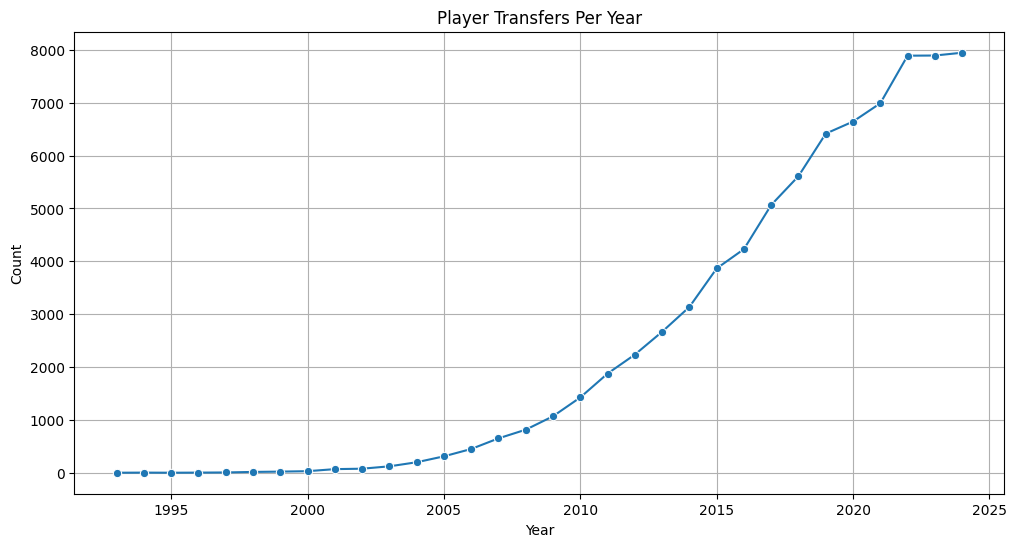


Transfer Fee Distribution:
count    5.193100e+04
mean     1.115650e+06
std      5.258424e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.800000e+08
Name: transfer_fee, dtype: float64

Market Value vs Transfer Fee:
Correlation: 0.67
Average ratios:
market_value_in_eur
<1M       0.353874
1-5M      0.366340
5-10M     0.459388
10-20M    0.513031
20-50M    0.577410
>50M      0.771991
Name: fee_to_value_ratio, dtype: float64


/tmp/ipython-input-17-2444998705.py:89: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(transfers_with_value.groupby(pd.cut(transfers_with_value['market_value_in_eur'],


In [ ]:
# --- Player Transfer Frequency Analysis ---
print("\n--- Player Transfer Frequency Analysis ---")

# Convert 'transfer_date' to datetime
transfers_df['transfer_date'] = pd.to_datetime(transfers_df['transfer_date'])

# Calculate transfer count per player
player_transfer_counts = transfers_df['player_id'].value_counts().reset_index()
player_transfer_counts.columns = ['player_id', 'transfer_count']

# Merge with players_df for player attributes
player_transfer_frequency = player_transfer_counts.merge(
    players_df[['player_id', 'name', 'position', 'country_of_citizenship']],
    on='player_id',
    how='left'
)

# Summary statistics
print("\nPlayer Transfer Frequency Summary:")
print(player_transfer_frequency.describe())

# Top 10 players with most transfers
print("\nTop 10 Players with Most Transfers:")
print(player_transfer_frequency.nlargest(10, 'transfer_count'))

# Analysis by position
transfer_frequency_by_position = player_transfer_frequency.groupby('position')['transfer_count'] \
    .agg(['mean', 'median', 'sum', 'count']) \
    .reset_index() \
    .rename(columns={
        'mean': 'Average Transfers',
        'median': 'Median Transfers',
        'sum': 'Total Transfers',
        'count': 'Player Count'
    })

print("\nTransfer Frequency by Player Position:")
print(transfer_frequency_by_position.sort_values('Average Transfers', ascending=False))

# Analysis by country (filtered for significant samples)
min_players = 50
transfer_frequency_by_country = player_transfer_frequency.groupby('country_of_citizenship')['transfer_count'] \
    .agg(['mean', 'median', 'sum', 'count']) \
    .reset_index() \
    .rename(columns={
        'mean': 'Average Transfers',
        'median': 'Median Transfers',
        'sum': 'Total Transfers',
        'count': 'Player Count'
    })

print(f"\nTransfer Frequency by Country (≥{min_players} players):")
print(
    transfer_frequency_by_country[transfer_frequency_by_country['Player Count'] >= min_players]
    .sort_values('Average Transfers', ascending=False)
    .head(10)
)

# Yearly transfer trends
transfers_df['transfer_year'] = transfers_df['transfer_date'].dt.year
transfers_per_year = transfers_df.groupby('transfer_year').size().reset_index(name='Transfer Count')

# Exclude years 2025 and 2026
transfers_per_year = transfers_per_year[~transfers_per_year['transfer_year'].isin([2025, 2026])]

print("\nTransfers per Year:")
print(transfers_per_year)

# Plot yearly trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='transfer_year', y='Transfer Count', data=transfers_per_year, marker='o')
plt.title('Player Transfers Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Transfer fee analysis using built-in market value
print("\nTransfer Fee Distribution:")
print(transfers_df['transfer_fee'].describe())

# Market value vs. transfer fee analysis
transfers_with_value = transfers_df[['player_id', 'transfer_fee', 'market_value_in_eur']].copy()
transfers_with_value['fee_to_value_ratio'] = transfers_with_value['transfer_fee'] / transfers_with_value['market_value_in_eur']

print("\nMarket Value vs Transfer Fee:")
print(f"Correlation: {transfers_with_value['transfer_fee'].corr(transfers_with_value['market_value_in_eur']):.2f}")
print("Average ratios:")
print(transfers_with_value.groupby(pd.cut(transfers_with_value['market_value_in_eur'],
                                         bins=[0, 1e6, 5e6, 10e6, 20e6, 50e6, float('inf')],
                                         labels=['<1M', '1-5M', '5-10M', '10-20M', '20-50M', '>50M']))
                               ['fee_to_value_ratio'].mean())



--- Player Transfer Value Analysis ---

Top 10 Most Expensive Players (Career Transfer Fees):
      player_id  total_transfer_fee               name  position  \
649       96341         352060000.0      Romelu Lukaku    Attack   
2657     288230         220000000.0    Ousmane Dembélé    Attack   
3088     326031         197500000.0   Matthijs de Ligt  Defender   
3340     342229         180000000.0      Kylian Mbappé    Attack   
4792     462250         179200000.0         João Félix    Attack   
158       45320         179000000.0     Ángel Di María    Attack   
886      125781         172000000.0  Antoine Griezmann    Attack   
488       80444         171800000.0  Philippe Coutinho  Midfield   
6848     648195         165250000.0     Enzo Fernández  Midfield   
929      128223         164000000.0      Álvaro Morata    Attack   

     country_of_citizenship  
649                 Belgium  
2657                 France  
3088            Netherlands  
3340                 France  
4792  

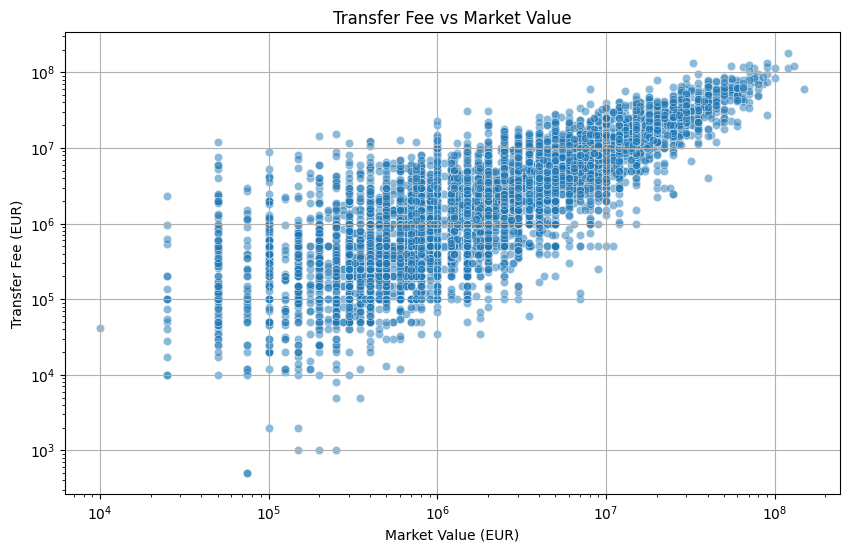

In [ ]:
# --- Player Transfer Value Analysis ---
print("\n--- Player Transfer Value Analysis ---")

# Convert transfer_date to datetime
transfers_df['transfer_date'] = pd.to_datetime(transfers_df['transfer_date'])

# 1. Player-Level Analysis: Total transfer fees per player
player_transfer_values = transfers_df.groupby('player_id')['transfer_fee'].sum().reset_index()
player_transfer_values.columns = ['player_id', 'total_transfer_fee']

# Merge with player information
player_value_analysis = pd.merge(
    player_transfer_values,
    players_df[['player_id', 'name', 'position', 'country_of_citizenship']],
    on='player_id',
    how='left'
)

# Filter out free transfers (fee = 0)
paid_transfers = player_value_analysis[player_value_analysis['total_transfer_fee'] > 0]

print("\nTop 10 Most Expensive Players (Career Transfer Fees):")
print(paid_transfers.nlargest(10, 'total_transfer_fee'))

# 2. Position-Level Analysis
position_value_analysis = paid_transfers.groupby('position')['total_transfer_fee'].agg(
    ['sum', 'mean', 'median', 'count']
).reset_index()
position_value_analysis.columns = [
    'Position',
    'Total Transfer Fees',
    'Average Fee per Player',
    'Median Fee per Player',
    'Players with Paid Transfers'
]

print("\nTransfer Value by Position:")
print(position_value_analysis.sort_values('Total Transfer Fees', ascending=False))

# 3. Country-Level Analysis (min 20 players)
country_value_analysis = paid_transfers.groupby('country_of_citizenship')['total_transfer_fee'].agg(
    ['sum', 'mean', 'median', 'count']
).reset_index()
country_value_analysis.columns = [
    'Country',
    'Total Transfer Fees',
    'Average Fee per Player',
    'Median Fee per Player',
    'Players with Paid Transfers'
]

min_players = 20
filtered_country_analysis = country_value_analysis[
    country_value_analysis['Players with Paid Transfers'] >= min_players
]

print(f"\nTransfer Value by Country (≥{min_players} players with paid transfers):")
print(filtered_country_analysis.sort_values('Total Transfer Fees', ascending=False).head(10))

# 4. Yearly Transfer Market Trends
transfers_df['transfer_year'] = transfers_df['transfer_date'].dt.year
yearly_transfer_market = transfers_df.groupby('transfer_year')['transfer_fee'].agg(
    ['sum', 'mean', 'median', 'count']
).reset_index()
yearly_transfer_market.columns = [
    'Year',
    'Total Transfer Fees',
    'Average Fee',
    'Median Fee',
    'Number of Transfers'
]

print("\nYearly Transfer Market Summary:")
print(yearly_transfer_market)

# 5. Club Net Spend Analysis (using from_club_id and to_club_id)
# Calculate money spent (buying)
club_spending = transfers_df.groupby('to_club_id')['transfer_fee'].sum().reset_index()
club_spending.columns = ['club_id', 'total_spent']

# Calculate money received (selling)
club_income = transfers_df.groupby('from_club_id')['transfer_fee'].sum().reset_index()
club_income.columns = ['club_id', 'total_income']

# Merge with club information
club_finances = pd.merge(
    clubs_df[['club_id', 'name', 'domestic_competition_id']],
    club_spending,
    on='club_id',
    how='left'
).merge(
    club_income,
    on='club_id',
    how='left'
)

# Calculate net spend
club_finances['net_spend'] = club_finances['total_spent'] - club_finances['total_income']
club_finances = club_finances.fillna(0)

print("\nTop 10 Clubs by Net Spend:")
print(club_finances.nlargest(10, 'net_spend')[['name', 'total_spent', 'total_income', 'net_spend']])

# 6. Fee vs Market Value Comparison
value_comparison = transfers_df[['transfer_fee', 'market_value_in_eur']].copy()
value_comparison = value_comparison[value_comparison['transfer_fee'] > 0]  # Only paid transfers

# Calculate premium/discount
value_comparison['fee_to_value_ratio'] = (
    value_comparison['transfer_fee'] / value_comparison['market_value_in_eur']
)

print("\nTransfer Fee vs Market Value Analysis:")
print(f"Correlation Coefficient: {value_comparison['transfer_fee'].corr(value_comparison['market_value_in_eur']):.2f}")
print("\nFee/Value Ratio Distribution:")
print(value_comparison['fee_to_value_ratio'].describe())

# Plot fee vs value relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='market_value_in_eur',
    y='transfer_fee',
    data=value_comparison,
    alpha=0.5
)
plt.title('Transfer Fee vs Market Value')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Transfer Fee (EUR)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# Overvalue Players & undervalue
To analyze players who may be overvalued in terms of market value, we'll adopt a data-driven approach that compares actual market values to performance-based expected values. Here's a structured methodology and code implementation:

Approach
Performance-Value Benchmarking:

Compare players' market values to peers in the same position

Identify players with high value but below-average performance metrics

Regression Analysis:

Predict expected market value based on performance statistics

Flag players with actual values significantly higher than predicted values

Value-Efficiency Ratio:

Calculate cost per performance point (goals, assists, etc.)

Identify players with high cost relative to output

In [ ]:
# --- Overvalued Player Analysis ---
print("\n--- Identifying Potentially Overvalued Players ---")

# 1. Prepare performance data (current/last season)
current_season = games_df['season'].max()
season_games = games_df[games_df['season'] == current_season]

# Get player appearances for the season
season_appearances = appearances_df[appearances_df['game_id'].isin(season_games['game_id'])]

# Aggregate performance stats
player_performance = season_appearances.groupby('player_id').agg(
    total_goals=('goals', 'sum'),
    total_assists=('assists', 'sum'),
    total_minutes=('minutes_played', 'sum'),
    match_count=('appearance_id', 'count')
).reset_index()

# 2. Get latest market values
latest_valuations = player_valuations_df.sort_values('date', ascending=False).drop_duplicates('player_id')
player_data = pd.merge(
    player_performance,
    latest_valuations[['player_id', 'market_value_in_eur']],
    on='player_id',
    how='inner'
)

# 3. Add player metadata
player_data = pd.merge(
    player_data,
    players_df[['player_id', 'name', 'position', 'date_of_birth']],
    on='player_id',
    how='left'
)

# Calculate age
player_data['age'] = (pd.Timestamp.now() - pd.to_datetime(player_data['date_of_birth'])).dt.days // 365

# 4. Position-based value analysis
position_benchmarks = player_data.groupby('position').agg(
    avg_market_value=('market_value_in_eur', 'mean'),
    avg_goals=('total_goals', 'mean'),
    avg_assists=('total_assists', 'mean'),
    avg_minutes=('total_minutes', 'mean')
).reset_index()

player_data = pd.merge(
    player_data,
    position_benchmarks,
    on='position',
    suffixes=('', '_benchmark')
)

# Calculate performance ratios
player_data['value_ratio'] = player_data['market_value_in_eur'] / player_data['avg_market_value']
player_data['goal_efficiency'] = player_data['total_goals'] / player_data['avg_goals']
player_data['assist_efficiency'] = player_data['total_assists'] / player_data['avg_assists']

# 5. Identify potentially overvalued players
overvalued_candidates = player_data[
    (player_data['value_ratio'] > 1.5) &  # 50% above position average
    (
        (player_data['goal_efficiency'] < 0.8) |
        (player_data['assist_efficiency'] < 0.8
    ) &  # Underperforming in key metrics
    (player_data['total_minutes'] > 900)  # Minimum playing time
    )]

print("\nPotentially Overvalued Players (High Value/Low Performance):")
print(overvalued_candidates[['name', 'position', 'age', 'market_value_in_eur',
                             'total_goals', 'total_assists', 'value_ratio']]
      .sort_values('value_ratio', ascending=False))

# 6. Regression Analysis (Predict expected value)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data for modeling
model_data = player_data.dropna(subset=['market_value_in_eur', 'total_goals',
                                       'total_assists', 'total_minutes', 'age'])
X = model_data[['position', 'age', 'total_goals', 'total_assists', 'total_minutes']]
y = model_data['market_value_in_eur']

# Convert positions to categories
X = pd.get_dummies(X, columns=['position'], drop_first=True)

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
model_data['predicted_value'] = model.predict(X)
model_data['value_deviation'] = model_data['market_value_in_eur'] - model_data['predicted_value']
model_data['overvalue_ratio'] = model_data['market_value_in_eur'] / model_data['predicted_value']

# Identify regression-based overvalued players
regression_overvalued = model_data[
    (model_data['overvalue_ratio'] > 1.7) &  # 70% above predicted value
    (model_data['predicted_value'] > 1000000)  # Minimum value threshold
].sort_values('overvalue_ratio', ascending=False)

print("\nRegression-Based Overvalued Players:")
print(regression_overvalued[['name', 'position', 'age', 'market_value_in_eur',
                             'predicted_value', 'overvalue_ratio']].head(20))

# 7. Performance Efficiency Analysis
player_data['cost_per_goal'] = player_data['market_value_in_eur'] / player_data['total_goals'].replace(0, 0.1)
player_data['cost_per_assist'] = player_data['market_value_in_eur'] / player_data['total_assists'].replace(0, 0.1)
player_data['cost_per_minute'] = player_data['market_value_in_eur'] / player_data['total_minutes']

# Calculate position averages for efficiency
position_efficiency = player_data.groupby('position').agg(
    avg_cost_per_goal=('cost_per_goal', 'mean'),
    avg_cost_per_assist=('cost_per_assist', 'mean'),
    avg_cost_per_minute=('cost_per_minute', 'mean')
).reset_index()

player_data = pd.merge(player_data, position_efficiency, on='position')

# Identify inefficient players
inefficient_players = player_data[
    ((player_data['cost_per_goal'] > 1.5 * player_data['avg_cost_per_goal']) |
     (player_data['cost_per_assist'] > 1.5 * player_data['avg_cost_per_assist'])) &
    (player_data['total_minutes'] > 1000)
].sort_values('cost_per_goal', ascending=False)

print("\nHigh-Cost/Low-Efficiency Players:")
print(inefficient_players[['name', 'position', 'market_value_in_eur',
                           'cost_per_goal', 'avg_cost_per_goal']].head(15))


--- Identifying Potentially Overvalued Players ---

Potentially Overvalued Players (High Value/Low Performance):
                     name  position  age  market_value_in_eur  total_goals  \
2189                Rodri  Midfield   29            130000000            0   
3260       William Saliba  Defender   24             80000000            2   
1375           Rúben Dias  Defender   28             70000000            0   
4529       Moisés Caicedo  Midfield   23             80000000            1   
2671  Aurélien Tchouaméni  Midfield   25             80000000            1   
...                   ...       ...  ...                  ...          ...   
4469        Jonathan Rowe    Attack   22             12000000            2   
5113       Luciano Gondou    Attack   24             12000000            9   
2268          Patson Daka    Attack   26             12000000            1   
5169   Alessandro Circati  Defender   21              8500000            0   
5108    Kosta Nedeljkovic  D


--- Identifying Overvalued Players by Position ---

=== Analyzing Goalkeepers ===
Found 78 potentially overvalued Goalkeepers
                 name    position  age  market_value_in_eur  predicted_value  \
22960    Marcin Bulka  Goalkeeper   25           20000000.0     3.889392e+06   
12104       Nick Pope  Goalkeeper   33           10000000.0     2.093964e+06   
12048     Brice Samba  Goalkeeper   31           15000000.0     3.466139e+06   
15409      Unai Simón  Goalkeeper   28           28000000.0     7.922499e+06   
21912  Aaron Ramsdale  Goalkeeper   27           16000000.0     4.533505e+06   

       overvalue_ratio  
22960         5.142192  
12104         4.775631  
12048         4.327581  
15409         3.534238  
21912         3.529278  

=== Analyzing Defenders ===
Found 324 potentially overvalued Defenders
                   name  position  age  market_value_in_eur  predicted_value  \
21134      Éder Militão  Defender   27           40000000.0     7.409680e+06   
25196  Mic

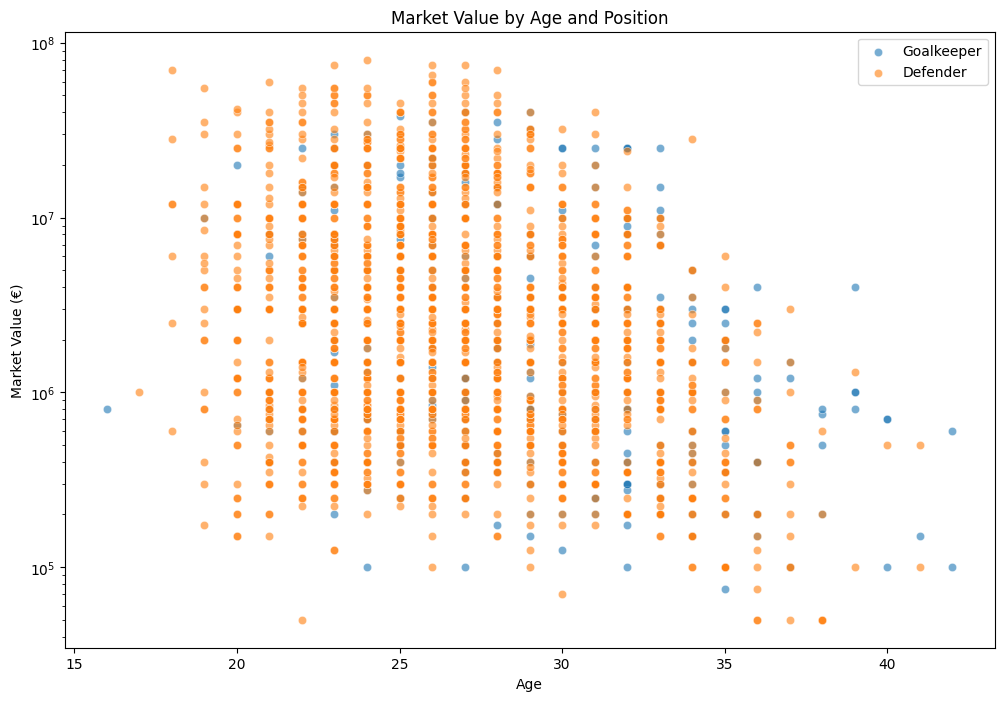

In [ ]:
# --- Identifying Overvalued Players by Position (Corrected) ---
print("\n--- Identifying Overvalued Players by Position ---")

# 1. Prepare latest player valuations (use players_df's market value as primary)
player_data = players_df.copy()

# 2. Add performance data from appearances
current_season = games_df['season'].max()
season_games = games_df[games_df['season'] == current_season]

# Aggregate player stats
player_stats = appearances_df[
    appearances_df['game_id'].isin(season_games['game_id'])
].groupby('player_id').agg(
    total_goals=('goals', 'sum'),
    total_assists=('assists', 'sum'),
    total_minutes=('minutes_played', 'sum'),
    yellow_cards=('yellow_cards', 'sum'),
    red_cards=('red_cards', 'sum'),
    appearances=('appearance_id', 'count')
).reset_index()

# 3. Merge data
player_data = player_data.merge(player_stats, on='player_id', how='left')

# Filter players with sufficient minutes and existing market value
player_data = player_data[
    (player_data['total_minutes'] > 450) &
    (player_data['market_value_in_eur'].notna())
]

# 4. Add captaincy status from lineups
captains = game_lineups_df[game_lineups_df['team_captain'] == True]['player_id'].unique()
player_data['is_captain'] = player_data['player_id'].isin(captains)

# 5. Calculate age
player_data['age'] = (pd.Timestamp.now() - pd.to_datetime(player_data['date_of_birth'])).dt.days // 365

# 6. Position mapping (simplify positions)
position_map = {
    'Goalkeeper': ['Goalkeeper'],
    'Defender': ['Centre-Back', 'Left-Back', 'Right-Back', 'Defender'],
    'Midfielder': ['Central Midfield', 'Attacking Midfield', 'Defensive Midfield', 'Midfielder'],
    'Attack': ['Centre-Forward', 'Second Striker', 'Left Winger', 'Right Winger', 'Forward']
}

# Reverse mapping for grouping
player_data['position_group'] = 'Other'
for group, positions in position_map.items():
    for pos in positions:
        player_data.loc[player_data['position'].str.contains(pos, na=False), 'position_group'] = group

# 7. Position-specific analysis functions
def analyze_position(position_group, metrics, weights):
    """Analyze overvaluation for specific position group"""
    pos_data = player_data[player_data['position_group'] == position_group].copy()
    if len(pos_data) == 0:
        return pd.DataFrame()

    # Calculate performance score
    pos_data['performance_score'] = 0
    for metric, weight in zip(metrics, weights):
        # Handle possible missing metrics
        if metric not in pos_data.columns:
            pos_data[metric] = 0
        metric_mean = pos_data[metric].mean()
        if pos_data[metric].std() > 0:  # Avoid division by zero
            pos_data[f'z_{metric}'] = (pos_data[metric] - metric_mean) / pos_data[metric].std()
        else:
            pos_data[f'z_{metric}'] = 0
        pos_data['performance_score'] += pos_data[f'z_{metric}'] * weight

    # Prepare features for modeling
    X = pos_data[['age', 'total_minutes'] + metrics].fillna(0)
    y = np.log1p(pos_data['market_value_in_eur'])  # Log transform

    # Train model if enough samples
    if len(X) > 10:
        model = RandomForestRegressor(n_estimators=50, random_state=42)
        model.fit(X, y)
        pos_data['predicted_value'] = np.expm1(model.predict(X))
    else:
        pos_data['predicted_value'] = pos_data['market_value_in_eur']

    pos_data['overvalue_ratio'] = pos_data['market_value_in_eur'] / pos_data['predicted_value']

    return pos_data

# 8. Position-specific parameters (using available metrics)
position_config = {
    'Goalkeeper': {
        'metrics': ['appearances', 'total_minutes'],
        'weights': [0.6, 0.4]
    },
    'Defender': {
        'metrics': ['appearances', 'total_minutes', 'yellow_cards'],
        'weights': [0.5, 0.3, -0.2]  # Negative weight for yellow cards
    },
    'Midfielder': {
        'metrics': ['appearances', 'total_minutes', 'total_goals', 'total_assists'],
        'weights': [0.3, 0.3, 0.2, 0.2]
    },
    'Attack': {
        'metrics': ['total_goals', 'total_assists', 'appearances'],
        'weights': [0.6, 0.3, 0.1]
    }
}

# 9. Run analysis for each position
for position, config in position_config.items():
    print(f"\n=== Analyzing {position}s ===")
    results = analyze_position(position, config['metrics'], config['weights'])

    if not results.empty:
        overvalued = results[
            (results['overvalue_ratio'] > 1.5) &
            (results['predicted_value'] > 500000)
        ].sort_values('overvalue_ratio', ascending=False)

        print(f"Found {len(overvalued)} potentially overvalued {position}s")
        if len(overvalued) > 0:
            print(overvalued[['name', 'position', 'age', 'market_value_in_eur',
                             'predicted_value', 'overvalue_ratio']].head(5))
    else:
        print(f"No players found for position: {position}")

# 10. Simple visualization of results
plt.figure(figsize=(12, 8))
for position in position_config.keys():
    pos_data = player_data[player_data['position_group'] == position]
    if not pos_data.empty:
        sns.scatterplot(
            x='age',
            y='market_value_in_eur',
            data=pos_data,
            label=position,
            alpha=0.6
        )

plt.title('Market Value by Age and Position')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.yscale('log')
plt.legend()
plt.show()

# Goals vs market-value | building different features for other position
Based on the relation - we can have a rough estimation that goals does positively affect the players' market value. Mainly for the **Attackers**

in this point - we need to know any property we can use for other position : goalkeepers, defender and midfielder

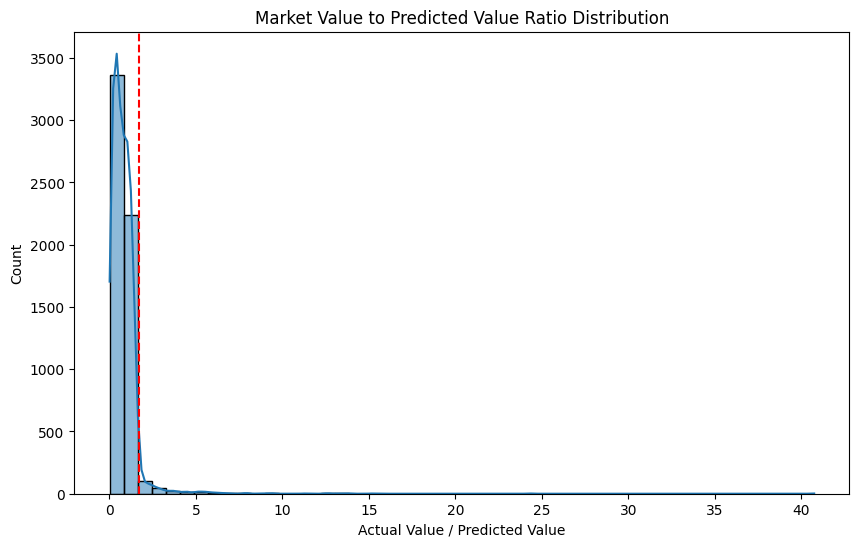

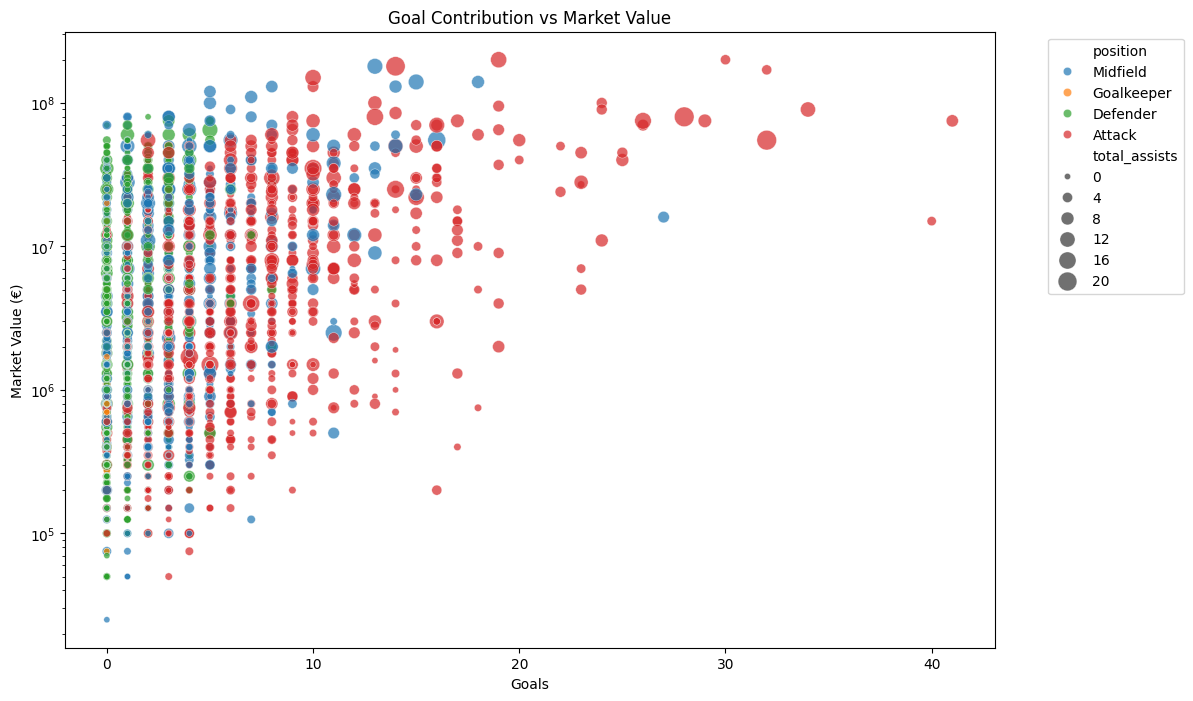

In [ ]:
# 1. Overvalue Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=model_data, x='overvalue_ratio', bins=50, kde=True)
plt.axvline(x=1.7, color='r', linestyle='--')
plt.title('Market Value to Predicted Value Ratio Distribution')
plt.xlabel('Actual Value / Predicted Value')
plt.show()

# 2. Performance vs Value Bubble Chart
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=player_data,
    x='total_goals',
    y='market_value_in_eur',
    hue='position',
    size='total_assists',
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Goal Contribution vs Market Value')
plt.xlabel('Goals')
plt.ylabel('Market Value (€)')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Club values - affecting players value?

Defining club tier

1.   Top-tier clubs: Teams in major leagues (e.g., Premier League, La Liga).

2.   Mid-tier clubs: Teams in mid-level leagues (e.g., Eredivisie, Liga Portugal).
3. Lower-tier clubs: Teams in minor leagues.

In [ ]:
# 1. Group clubs into tiers based on league reputation
competitions_df['tier'] = competitions_df['is_major_national_league'].apply(
    lambda x: 'High' if x == 1 else ('Mid' if x == 0 else 'Low')
)

# Merge clubs with competitions to get tier (using correct column names)
clubs_with_tier = pd.merge(
    clubs_df[['club_id', 'name', 'domestic_competition_id', 'total_market_value']],
    competitions_df[['competition_id', 'tier']],
    left_on='domestic_competition_id',
    right_on='competition_id',
    how='left'
).rename(columns={'name': 'club_name'})

# 2. Number of players per club
players_per_club = players_df.groupby('current_club_id').size().reset_index(name='player_count')

# 3. Highest market value player per club
highest_value_players = players_df.loc[
    players_df.groupby('current_club_id')['market_value_in_eur'].idxmax()
][['current_club_id', 'name', 'market_value_in_eur']].rename(columns={'name': 'top_player'})

# 4. Transfer frequency per club
transfers_per_club = transfers_df.groupby('to_club_id').size().reset_index(name='transfer_count')

# 5. Average transfer amount per club
avg_transfer_amount = transfers_df.groupby('to_club_id')['transfer_fee'].mean().reset_index(name='avg_transfer_fee')

# 6. Total goals per club (from appearances)
goals_per_club = appearances_df.groupby('player_club_id')['goals'].sum().reset_index(name='total_goals')

# Combine all metrics with proper column names
club_metrics = clubs_with_tier.merge(
    players_per_club, left_on='club_id', right_on='current_club_id', how='left'
).merge(
    highest_value_players, left_on='club_id', right_on='current_club_id', how='left'
).merge(
    transfers_per_club, left_on='club_id', right_on='to_club_id', how='left'
).merge(
    avg_transfer_amount, left_on='club_id', right_on='to_club_id', how='left'
).merge(
    goals_per_club, left_on='club_id', right_on='player_club_id', how='left'
)

# Select and rename relevant columns
final_report = club_metrics[[
    'club_id', 'club_name', 'tier', 'player_count',
    'top_player', 'market_value_in_eur', 'transfer_count',
    'avg_transfer_fee', 'total_goals'
]].rename(columns={
    'market_value_in_eur': 'top_player_value'
})

# Fill NaN values
final_report = final_report.fillna({
    'player_count': 0,
    'transfer_count': 0,
    'avg_transfer_fee': 0,
    'total_goals': 0,
    'top_player': 'Unknown',
    'top_player_value': 0
})

# Sort by tier and club name
final_report = final_report.sort_values(['tier', 'club_name'])

# Display results
print(final_report.head(10))

     club_id                             club_name  tier  player_count  \
339       39  1. Fußball- und Sportverein Mainz 05  High          90.0   
73      2036        1. Fußballclub Heidenheim 1846  High          35.0   
296       89           1. Fußballclub Union Berlin  High          70.0   
310        3                             1.FC Köln  High          74.0   
47         4                        1.FC Nuremberg  High          37.0   
118     1147                            AC Ajaccio  High          72.0   
195     4102                              AC Carpi  High          12.0   
146     1159                     AS Nancy-Lorraine  High          30.0   
300     1416                             Amiens SC  High          38.0   
275     1420       Angers Sporting Club de l'Ouest  High          87.0   

             top_player  top_player_value  transfer_count  avg_transfer_fee  \
339   Jonathan Burkardt        35000000.0           124.0      1.265294e+06   
73          Paul Wanner    

# Understand players transfer trend

In [ ]:
# Get all transfers for each player with key details
player_transfers = transfers_df[[
    'player_id', 'player_name', 'transfer_date', 'transfer_season',
    'from_club_id', 'from_club_name', 'to_club_id', 'to_club_name',
    'transfer_fee', 'market_value_in_eur'
]].sort_values(['player_id', 'transfer_date'])

# Add transfer sequence number for each player
player_transfers['transfer_number'] = player_transfers.groupby('player_id').cumcount() + 1

# Calculate time between transfers
player_transfers['days_since_last_transfer'] = player_transfers.groupby('player_id')['transfer_date'].diff().dt.days

In [ ]:

transfer_metrics = player_transfers.groupby('player_id').agg(
    total_transfers=('transfer_date', 'count'),
    first_transfer_date=('transfer_date', 'min'),
    last_transfer_date=('transfer_date', 'max'),
    avg_transfer_fee=('transfer_fee', 'mean'),
    max_transfer_fee=('transfer_fee', 'max'),
    clubs_played_for=('to_club_id', 'nunique')
).reset_index()

In [ ]:
# Merge with players_df to get current club
current_status = pd.merge(
    transfer_metrics,
    players_df[['player_id', 'current_club_id', 'current_club_name', 'contract_expiration_date']],
    on='player_id',
    how='left'
)

# Calculate days at current club
current_status['days_at_current_club'] = (datetime.now() - player_transfers.groupby('player_id')['transfer_date'].last()).dt.days

In [ ]:
def classify_transfer(row):
    if pd.isna(row['from_club_id']):
        return 'Academy Promotion'
    elif row['transfer_fee'] == 0:
        return 'Free Transfer'
    elif row['transfer_fee'] > 0:
        return 'Paid Transfer'
    else:
        return 'Loan/Other'

player_transfers['transfer_type'] = player_transfers.apply(classify_transfer, axis=1)

In [ ]:
transfer_summary = player_transfers.groupby(['player_id', 'player_name']).agg(
    first_transfer=('transfer_date', 'min'),
    last_transfer=('transfer_date', 'max'),
    total_clubs=('to_club_id', 'nunique'),
    total_fees=('transfer_fee', 'sum'),
    transfer_types=('transfer_type', lambda x: ', '.join(x.value_counts().astype(str)))
).reset_index()

In [ ]:
club_network = player_transfers.groupby(
    ['from_club_name', 'to_club_name']
).agg(
    player_count=('player_id', 'count'),
    total_fees=('transfer_fee', 'sum')
).reset_index().sort_values('player_count', ascending=False)

# foreigners

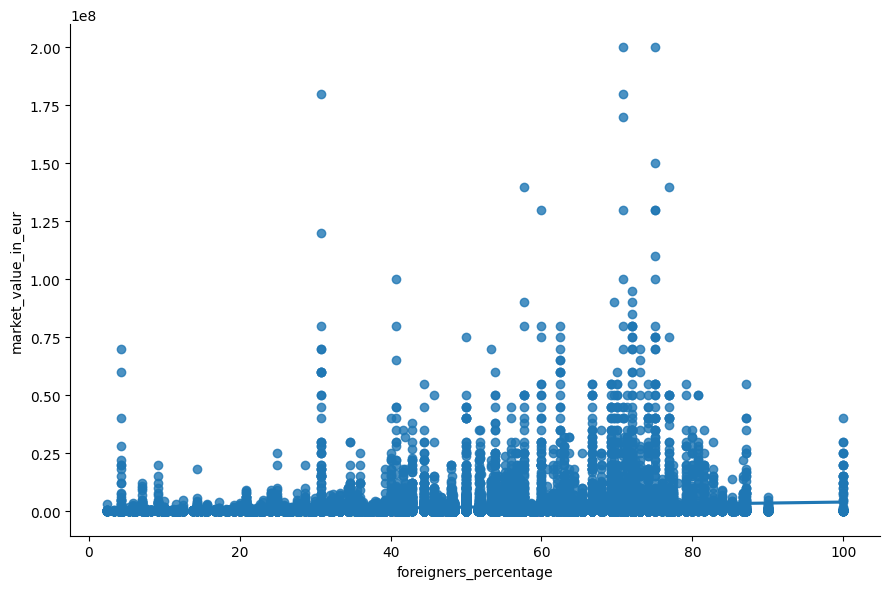

In [ ]:
foreign_effect = players_df.merge(
    clubs_df[['club_id','foreigners_percentage']],
    left_on='current_club_id',
    right_on='club_id'
)

sns.lmplot(x='foreigners_percentage', y='market_value_in_eur',
          data=foreign_effect, height=6, aspect=1.5)

# Performance Metrics Correlation

<Axes: >

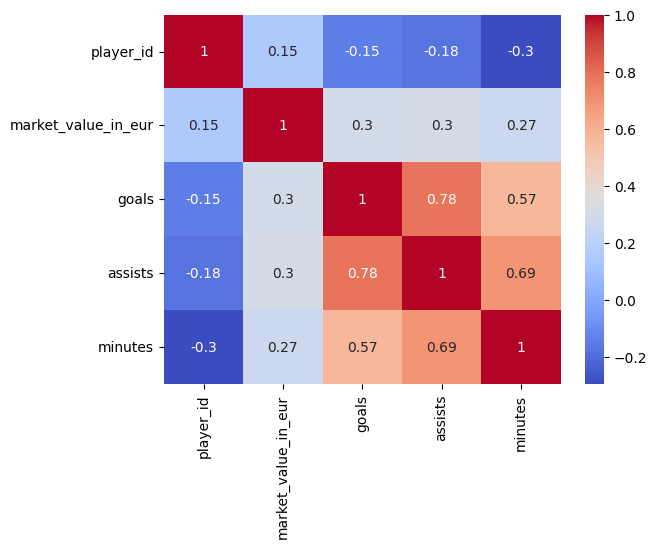

In [ ]:
performance_data = appearances_df.groupby('player_id').agg(
    goals=('goals','sum'),
    assists=('assists','sum'),
    minutes=('minutes_played','sum')
)

value_corr = pd.merge(
    players_df[['player_id','market_value_in_eur']],
    performance_data,
    on='player_id'
).corr()

sns.heatmap(value_corr, annot=True, cmap='coolwarm')

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


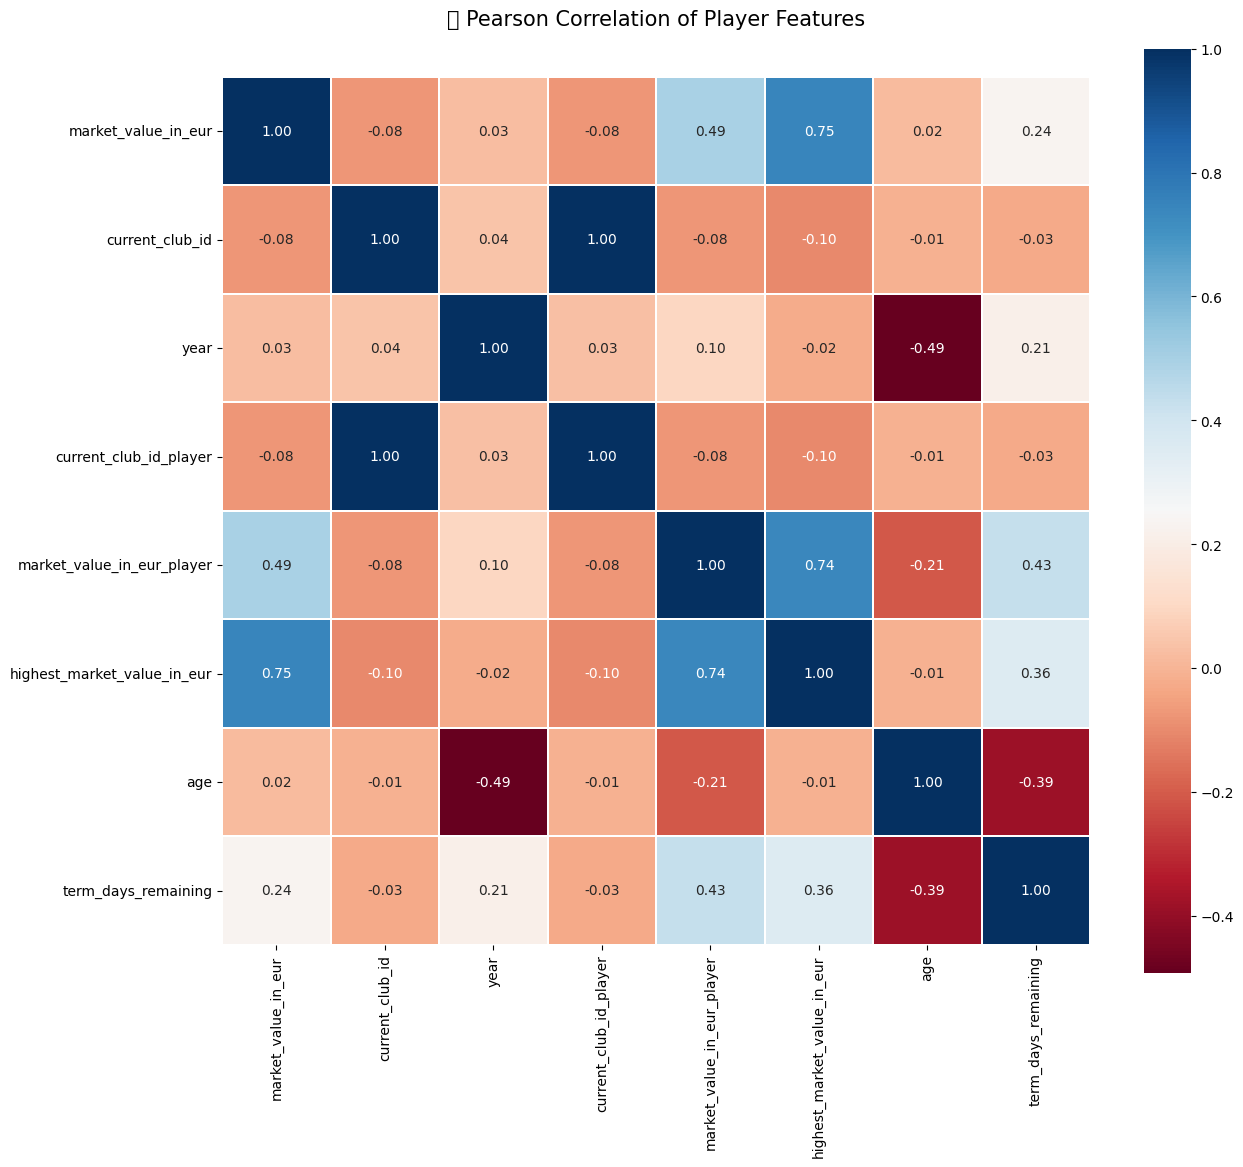

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Merge relevant data sources ---
# Merge player valuations with player info
merged_players_df = player_valuations_df.merge(
    players_df,
    on='player_id',
    how='left',
    suffixes=('', '_player')
)

# Optional: merge with appearances data if you want performance metrics
# appearances_summary = appearances_df.groupby('player_id')[['goals', 'assists', 'minutes_played']].sum().reset_index()
# merged_players_df = merged_players_df.merge(appearances_summary, on='player_id', how='left')

# --- Drop non-numeric or irrelevant columns ---
features_df = merged_players_df.drop([
    'player_id', 'name', 'first_name', 'last_name', 'position', 'sub_position',
    'last_season', 'foot', 'height_in_cm', 'country_of_citizenship',
    'country_of_birth', 'city_of_birth', 'current_club_name',
    'current_club_domestic_competition_id', 'agent_name', 'contract_expiration_date',
    'image_url', 'url', 'player_code', 'datetime'
], axis=1, errors='ignore')  # errors='ignore' skips missing columns safely

# --- Convert all columns to float for correlation ---
features_df = features_df.select_dtypes(include=['number']).astype(float)

# --- Plot correlation heatmap ---
plt.figure(figsize=(14, 12))
plt.title('📈 Pearson Correlation of Player Features', y=1.05, size=15)
colormap = plt.cm.RdBu
sns.heatmap(
    features_df.corr(),
    linewidths=0.1,
    vmax=1.0,
    square=True,
    cmap=colormap,
    linecolor='white',
    annot=True,
    fmt=".2f"
)
plt.show()


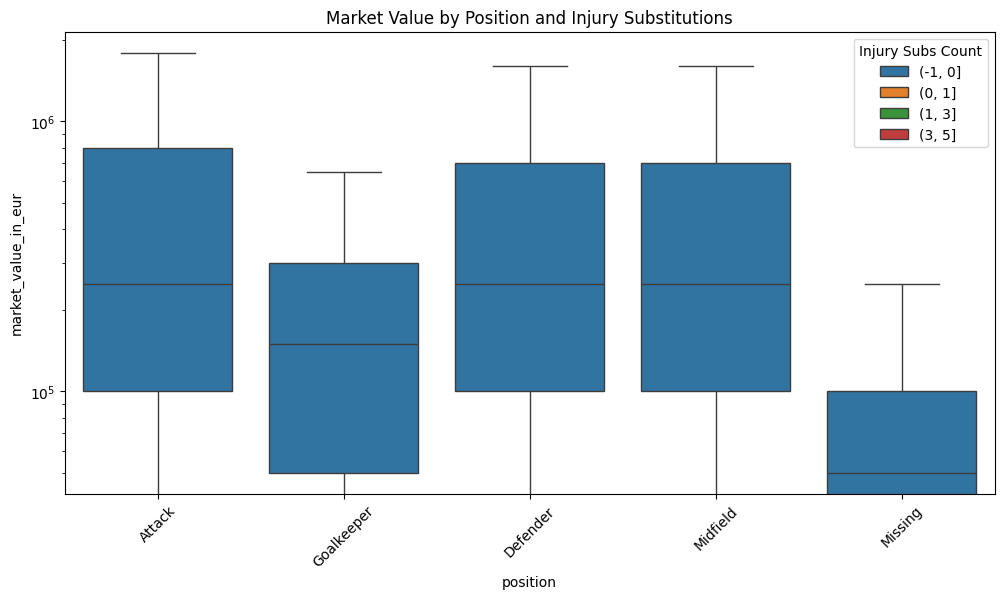

In [ ]:
# Advanced injury analysis using game_events
injury_events = game_events_df[
    (game_events_df['type'] == 'substitution') &
    (game_events_df['description'].str.contains('injury', case=False))
].groupby('player_id').size()

injury_analysis = pd.merge(
    players_df[['player_id', 'market_value_in_eur', 'position']],
    injury_events.rename('injury_substitutions'),
    on='player_id',
    how='left'
).fillna(0)

# Plot by position
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='position',
    y='market_value_in_eur',
    hue=pd.cut(injury_analysis['injury_substitutions'], bins=[-1, 0, 1, 3, 5]),
    data=injury_analysis,
    showfliers=False
)
plt.title('Market Value by Position and Injury Substitutions')
plt.legend(title='Injury Subs Count')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()